# Importing libraries

In [1]:
# Visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics

# Tuning 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor

# Models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from sklearn.svm import SVC
# from xgboost import XGBRegressor
# from xgboost.sklearn import XGBRegressor
# import lightgbm as lgb
# Import SVC classifier 


pd.set_option("display.max_columns", None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [4]:
# Read the data
full_gen_data = pd.read_csv(r"C:\Users\DELL\Desktop\New Vision\full_gen_data\full_gen_data.csv")

In [5]:
# Explore the data points
full_gen_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [6]:
# Explore the shape of data, data types of each column
full_gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [7]:
# Explore the statistics of the numerical columns
display(full_gen_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
sales,100000.0,56.781800,87.934743,1.000000,10.000000,26.000000,64.000000,898.00
regular_price,100000.0,52.391200,35.272128,3.950000,25.950000,40.950000,79.950000,197.95
current_price,100000.0,28.290800,22.578343,1.950000,11.950000,20.950000,37.950000,195.95
ratio,100000.0,0.545646,0.194363,0.296482,0.354839,0.525044,0.699248,1.00
promo1,100000.0,0.061900,0.240975,0.000000,0.000000,0.000000,0.000000,1.00
promo2,100000.0,0.004900,0.069829,0.000000,0.000000,0.000000,0.000000,1.00
customer_id,100000.0,2721.726500,1908.085499,1.000000,1017.000000,2091.000000,4570.250000,5999.00
cost,100000.0,6.517000,3.914728,1.290000,2.290000,6.950000,9.600000,13.29
rgb_r_main_col,100000.0,161.400000,39.790147,79.000000,138.000000,160.000000,205.000000,205.00
rgb_g_main_col,100000.0,139.600000,63.641814,26.000000,104.000000,144.000000,181.000000,238.00


In [8]:
# Discover whether you have null values or not
full_gen_data.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [9]:
# Feature names
full_gen_data.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

In [10]:
# Data features
Features = [ 
#        'country', 
#        'article', 
       'sales', 'regular_price', 'current_price',
       'ratio', 
#        'retailweek', 
       'promo1', 'promo2', 
#        'customer_id', 'article.1',
#        'productgroup', 'category', 
       'cost', 
#        'style', 'sizes', 
#        'gender',
#        'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
#        'rgb_g_sec_col', 'rgb_b_sec_col', 
#        'label'
]


<function matplotlib.pyplot.show(close=None, block=None)>

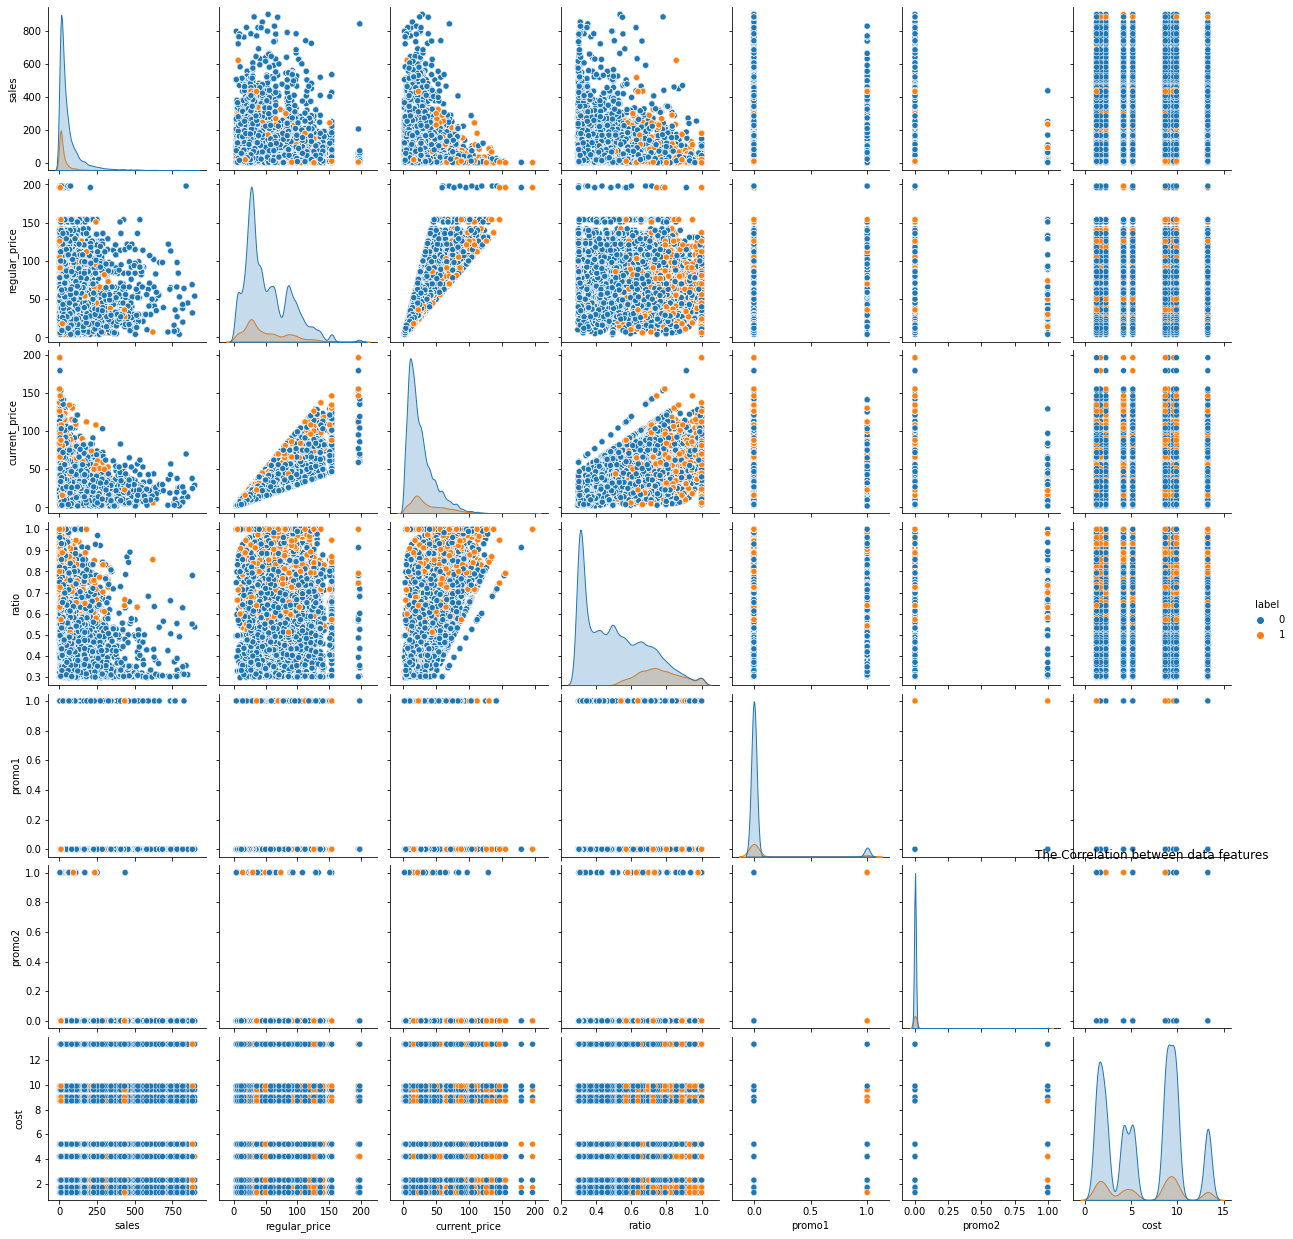

In [11]:
# For the sake of EDA Let's try to viulalize the data first.
# Specify the predictors
predictors = Features 
sns.pairplot(data = full_gen_data,x_vars=predictors, y_vars=predictors, 
             hue = 'label'
            );
plt.title("The Correlation between data features")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show

# Needed functions

In [5]:
# Function to display data frames in a horizontal view
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [6]:
# Function to get a count of a given column with respect to promo
def get_counts_with_label_and_promo(DF, col, label, promo):
    # Discover no. of sold items according to the target gender and promo = 1
    list_of_items = DF[col].value_counts().index

    temp = {}
    for item in list_of_items:
        x = DF[(DF[col]==item) &  (DF[label]==1) &  (DF[promo]==1)]
        temp[item] = x[label].sum()
    temp = pd.DataFrame(pd.Series(temp), columns= ['count'])


    # Discover no. of sold items according to the target gender and promo1 = 0
    temp2 = {}
    for item in list_of_items:
        x2 = DF[(DF[col]==item)&(DF[label]==1)&(DF[promo]==0)]
    #     print(gender+" Counts:", temp['label'].sum())
        temp2[item] = x2[label].sum()
    temp2 = pd.DataFrame(pd.Series(temp2), columns= ['count'])



    # Discover 'no sold' items according to the target gender and promo1 = 0
    temp3 = {}
    for item in list_of_items:
        x3 = DF[(DF[col]==item) &  (DF[label]==0) &  (DF[promo]==0)]
        temp3[item] = x3[label].notnull().sum()
    temp3 = pd.DataFrame(pd.Series(temp3), columns= ['count'])


    # Discover 'no sold' items according to the target gender and promo1 = 1
    temp4 = {}
    for item in list_of_items:
        x4 = DF[(DF[col]==item) &  (DF[label]==0) &  (DF[promo]==1)]
        temp4[item] = x4[label].notnull().sum()
    temp4 = pd.DataFrame(pd.Series(temp4), columns= ['count'])



    # Display tables
    display_side_by_side(temp, temp2, temp3, temp4,
                         titles = ['lab:1 - pro:1', 
                                   'lab:1 - pro:0',
                                   'lab:0 - pro:0',
                                   'lab:0 - pro:1'])

In [7]:
# Function to get a count of a given column
def get_counts(DF, col, label):
    # Count of each country
    Col_count_of_sales = DF.groupby(col).aggregate({col:'count'})


    # Total number of purchasing for each country
    Col_sum_of_sales = DF.groupby(col).aggregate({label:'sum'})


    # Combine the results in a data frame 
    col_data = {col:list(Col_count_of_sales.index), 
                    'count':list(Col_count_of_sales.values), 
                    'purchasing':list(Col_sum_of_sales.values)}
    

    Col_sales_df = pd.DataFrame(col_data).sort_values(by = 'count', ascending = False)
    Col_sales_df['No purchasing'] = Col_sales_df['count'] - Col_sales_df['purchasing']

    display(Col_sales_df)

In [8]:
# Function to count plot a given column
def countplot(DF, x, hue=None, rotation = 0, ticks_size = 15, labelsize = 20, titlesize = 20):
    sns.catplot(kind = 'count', data = DF, x=x, hue = hue, order= DF[x].value_counts().index)
    plt.xticks(fontsize = ticks_size, rotation = rotation)
    plt.yticks(fontsize = ticks_size)
    plt.ylabel('Counts',fontsize = labelsize)
    plt.xlabel(x,fontsize = labelsize)
    s = "Total No. of Each " + x
    plt.title(s, fontsize = titlesize)
    plt.show()

In [9]:
# Plot multi axes count plot
def FacetGridCountPlot(DF, x, col, row, xticks_size = 15, yticks_size =15, labelSize = 20, rotation = 0, order = None):
    g = sns.catplot(data=DF, x =x , kind = 'count', col = col, row = row, order = DF[x].value_counts().index)
    g.set_xticklabels( size = xticks_size, rotation = rotation)
#     g.set_yticklabels( size = yticks_size)

    g.set_ylabels( fontsize = labelSize)
    g.set_xlabels( fontsize = labelSize)

    plt.plot()

In [10]:
# Plot the counts of a given column
def spacific_countplot(DF,col, label, percentage):
    # Plot the count of each style with respect to label
    df = DF.loc[((DF[label]==0) & (full_gen_data[col]==0))]
    sns.catplot(data=df, x = col, kind='count')
    plt.title("Total no of customers who did not recieve " + col + " and did not purchase our products", fontsize=20);
    plt.xticks(fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.legend(['% '+str(percentage)], loc = 'center', fontsize='xx-large')
    plt.show()

In [11]:
# Plot pie chart of a given column
def piechart(values, labels, title, explode = [0.1, 0.1], pad=20):
    fig = plt.figure(figsize =(10, 7));
    plt.pie(values, 
            labels = labels, 
            explode = explode, 
            autopct = "%0.2f%%",
            shadow = True, 
            radius = 1.3,
            startangle = 50, 
            textprops ={"fontsize":17, 'color':'black'});
    plt.title(title, fontsize=20, pad=pad, color ='black')
#     plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    # show plot
#     plt.legend('best')
    plt.show()

# Data preprocessing

In [19]:
# Convert the column date into datetime format
full_gen_data['retailweek'] = pd.to_datetime(full_gen_data['retailweek'])

# Extract year, month, day, and day of weak
full_gen_data['year'] = full_gen_data['retailweek'].dt.year
full_gen_data['month'] = full_gen_data['retailweek'].dt.month
full_gen_data['day'] = full_gen_data['retailweek'].dt.day
full_gen_data['dayofweek'] = full_gen_data['retailweek'].dt.dayofweek
# full_gen_data['weekofyear'] = full_gen_data['retailweek'].dt.weekofyear

In [20]:
# full_gen_data.loc[full_gen_data['label']==1]['dayofweek'].value_counts()

In [21]:
# Value counts of year column
full_gen_data['year'].value_counts()

2015    42790
2016    41830
2017    14600
2014      780
Name: year, dtype: int64

# Exploratory data analysis

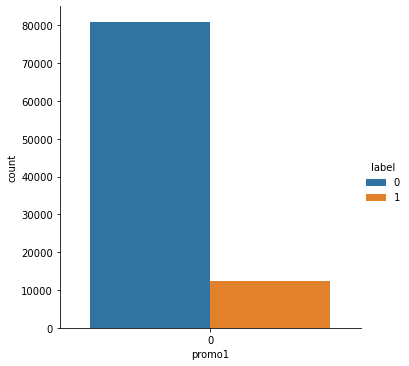

0
promo1 promo2 label       
0      0      0      80974
              1      12456

In [31]:
# mask = (full_gen_data['promo1'] == 1) & (full_gen_data['promo2'] == 1)
# promo1and2 = full_gen_data[mask]
# promo1and2 = promo1and2[['promo1', 'promo2', 'label']]
# sns.catplot(data = promo1and2, x='promo1', kind='count', hue='label')
# plt.show()
# pd.DataFrame(promo1and2.value_counts())



mask = (full_gen_data['promo1'] == 0) & (full_gen_data['promo2'] == 0)
promo1and2 = full_gen_data[mask]
promo1and2 = promo1and2[['promo1', 'promo2', 'label']]
sns.catplot(data = promo1and2, x='promo1', kind='count', hue='label')
plt.show()
pd.DataFrame(promo1and2.value_counts())

In [12]:
full_gen_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


## Explore countries

In [22]:
# Set seaborn style to whitegrid
sns.set_style('whitegrid')

In [23]:
# Display total no. of sold items with each company
get_counts(full_gen_data, 'country', 'label' )

,country,count,purchasing,No purchasing
2,Germany,[49400],[6837],[42563]
0,Austria,[35140],[5044],[30096]
1,France,[15460],[2047],[13413]


<Figure size 720x576 with 0 Axes>

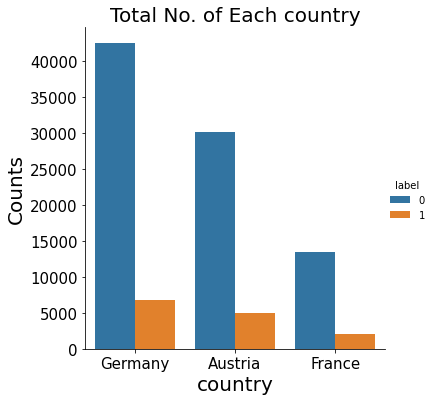

In [39]:
# Plot the count of each country with respect to label
countplot('Country count', full_gen_data, 'country', 'label')

In [36]:
# Country count with respct to [label and promo1] columns
print("Promo1")
get_counts_with_label_and_promo(full_gen_data, 'country', 'label', 'promo1')

Promo1


,count
Germany,672
Austria,519
France,206
,count
Germany,6165
Austria,4525
France,1841
,count
Germany,40215
Austria,28345


### % of customers who did not purchase any product:

In [26]:
# Calculating the total number of customers who did not buy and did not recieve promo1
No_purchasing_no_promo1 = full_gen_data.loc[((full_gen_data['label']==0) & (full_gen_data['promo1']==0))]['label'].count()
Total_len_of_data = full_gen_data.shape[0]

print("The total number of customers who did not recieve promo1 and did not buy anything is:(", No_purchasing_no_promo1, ") customer")
print("This total represent about  ({:.2%})  of the data\t".format(No_purchasing_no_promo1/Total_len_of_data))

The total number of customers who did not recieve promo1 and did not buy anything is:( 81279 ) customer
This total represent about  (81.28%)  of the data	


### We can conclude that our customers did not recieve any of our marketing campaign promotions

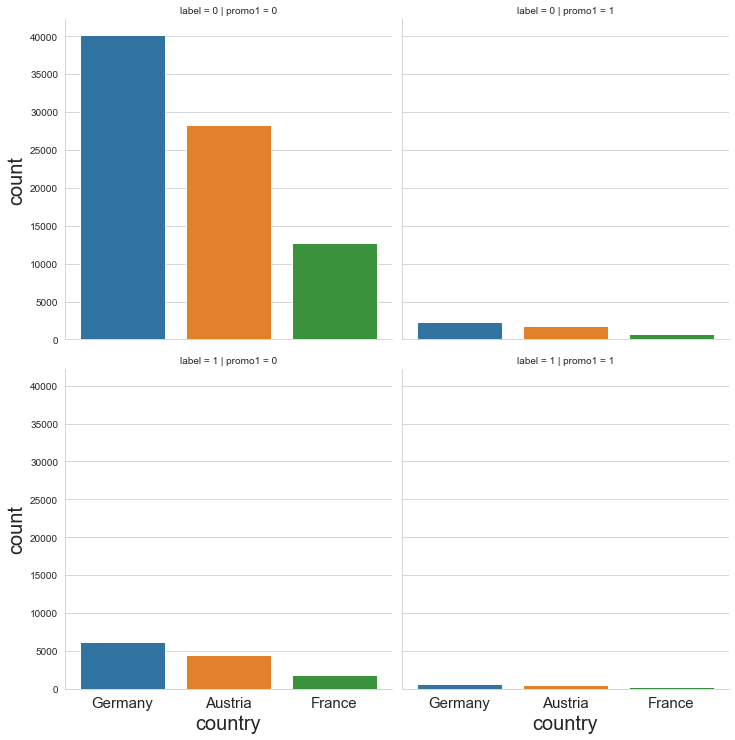

In [27]:
# Plot total no. of sold items with respect to country and promo1
FacetGridCountPlot(DF = full_gen_data,
                   x = 'country', 
                   col = 'promo1', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20)

In [28]:
# Country count with respect to [label and promo2] columns
print('Promo2')
get_counts_with_label_and_promo(full_gen_data, 'country', 'label', 'promo2')

Promo2


,count
Germany,0
Austria,0
France,117
,count
Germany,6837
Austria,5044
France,1930
,count
Germany,42563
Austria,30096


### % of coustomers who did not purchase any product 

In [29]:
# Calculating the total number of customers who did not buy and did not recieve promo2
No_purchasing_no_promo1 = full_gen_data.loc[((full_gen_data['label']==0) & (full_gen_data['promo2']==0))]['label'].count()
Total_len_of_data = full_gen_data.shape[0]

print("The total number of customers who did not recieve promo2 and did not buy anything is:(", No_purchasing_no_promo1, ") customer")
print("This total represent about  ( {:.2%} )  of the data\t".format(No_purchasing_no_promo1/Total_len_of_data))

The total number of customers who did not recieve promo2 and did not buy anything is:( 85699 ) customer
This total represent about  ( 85.70% )  of the data	


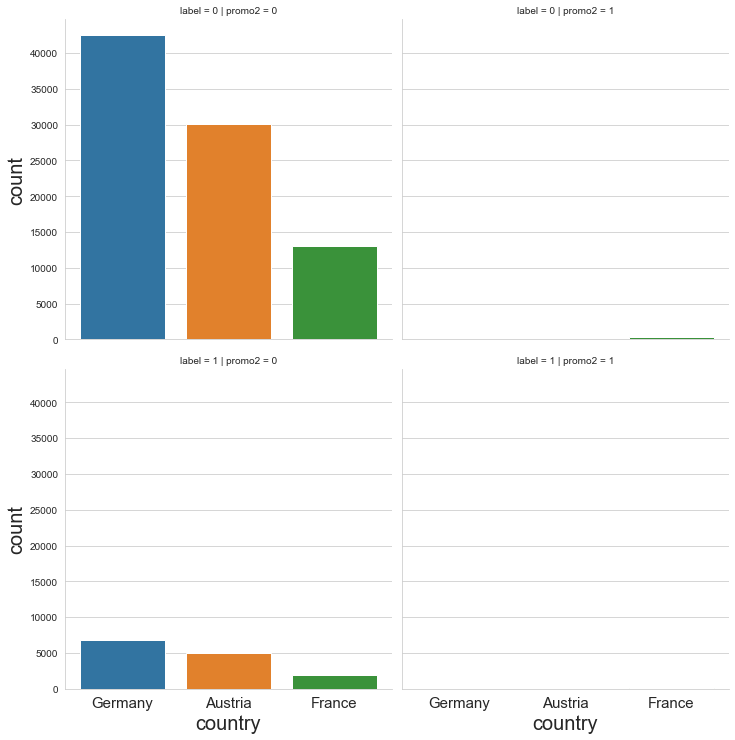

In [30]:
# Plot total no. of sold items with respect to country and promo2
FacetGridCountPlot(DF = full_gen_data,
                   x = 'country', 
                   col = 'promo2', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20)

# Explore category

In [31]:
# Display total no. of sold items with each category
get_counts(full_gen_data, 'category', 'label' )

,category,count,purchasing,No purchasing
5,TRAINING,[30000],[4121],[25879]
0,FOOTBALL GENERIC,[20000],[2802],[17198]
4,RUNNING,[20000],[2773],[17227]
1,GOLF,[10000],[1417],[8583]
2,INDOOR,[10000],[1348],[8652]
3,RELAX CASUAL,[10000],[1467],[8533]


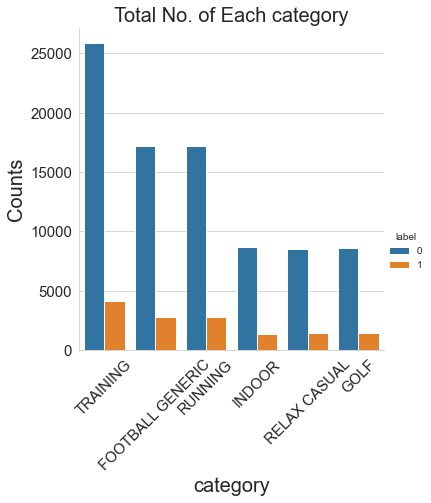

In [32]:
# Plot the count of each category with respect to label
countplot(full_gen_data, 'category', 'label', rotation = 45)

In [33]:
# Category count with respct to [label and promo1] columns
print("Promo1")
get_counts_with_label_and_promo(full_gen_data, 'category', 'label', 'promo1')

Promo1


,count
TRAINING,413
FOOTBALL GENERIC,269
RUNNING,294
INDOOR,128
RELAX CASUAL,139
GOLF,154
,count
TRAINING,3708
FOOTBALL GENERIC,2533
RUNNING,2479


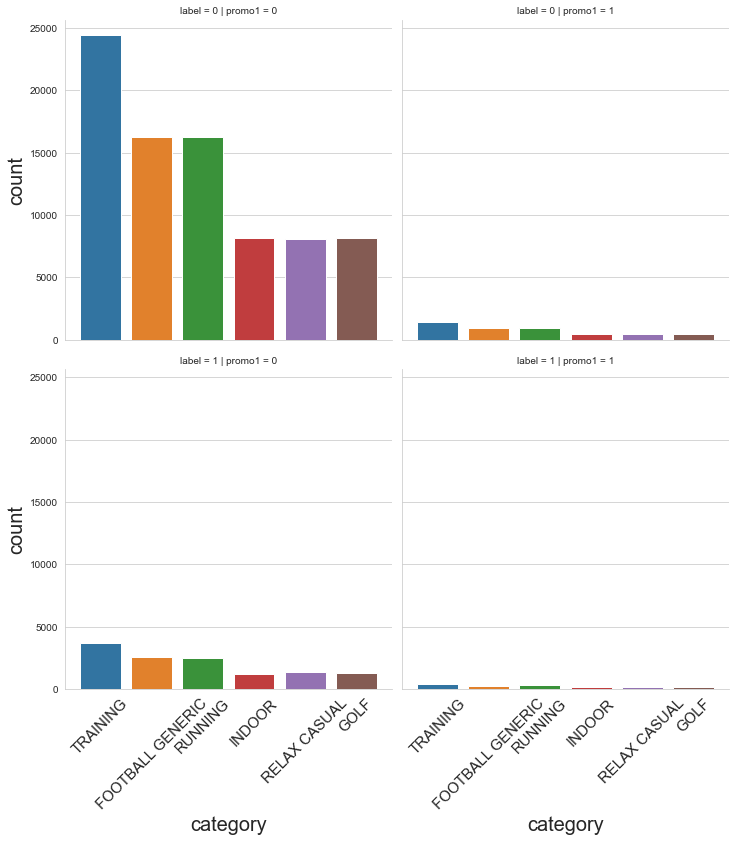

In [34]:
# Plot total no. of sold items with respect to category and promo1
FacetGridCountPlot(DF = full_gen_data,
                   x = 'category', 
                   col = 'promo1', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20, 
                   rotation = 45)

In [35]:
# Category count with respect to [label and promo2] columns
print('Promo2')
get_counts_with_label_and_promo(full_gen_data, 'category', 'label', 'promo2')

Promo2


,count
TRAINING,36
FOOTBALL GENERIC,22
RUNNING,20
INDOOR,14
RELAX CASUAL,14
GOLF,11
,count
TRAINING,4085
FOOTBALL GENERIC,2780
RUNNING,2753


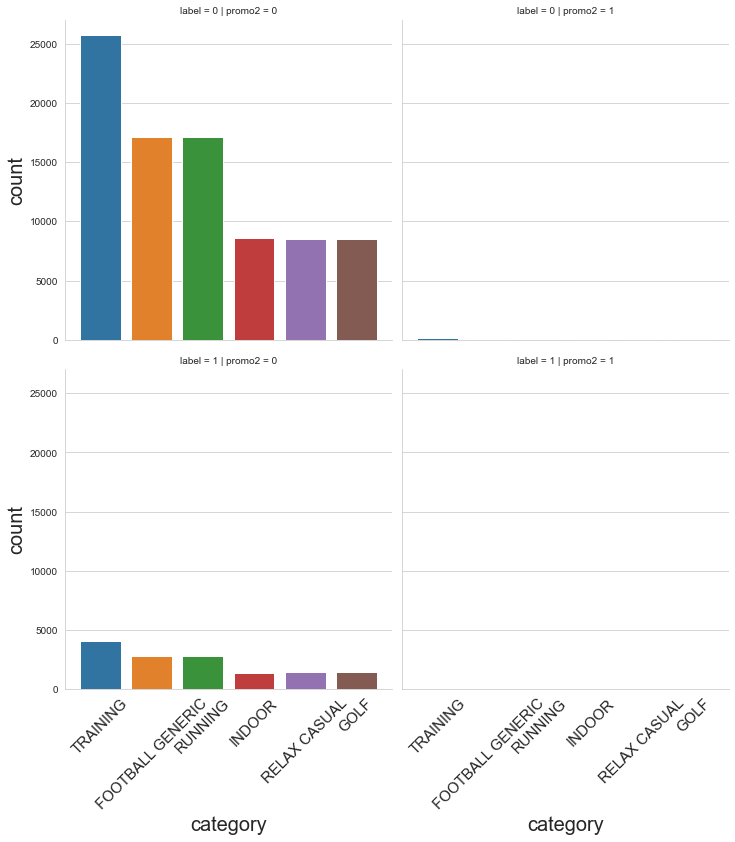

In [36]:
# Plot total no. of sold items with respect to category and promo2
FacetGridCountPlot(DF = full_gen_data,
                   x = 'category', 
                   col = 'promo2', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20,
                   rotation = 45)

## Explore gender

In [37]:
# Display total no. of sold items with respect to each gender
get_counts(full_gen_data, 'gender', 'label' )

,gender,count,purchasing,No purchasing
3,women,[70000],[9750],[60250]
0,kids,[10000],[1376],[8624]
1,men,[10000],[1376],[8624]
2,unisex,[10000],[1426],[8574]


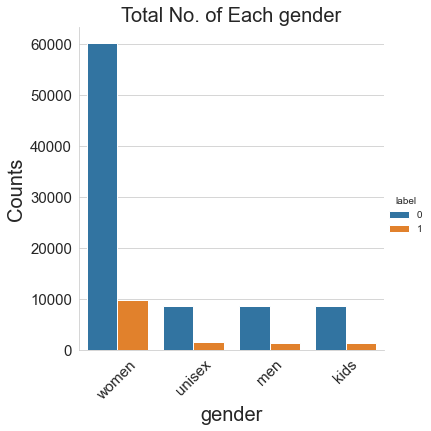

In [38]:
# Count of each gender according to label col
countplot(full_gen_data, 'gender', 'label', rotation = 45)


In [39]:
# Gender count with [label and promo1] columns
print('Promo 1')
get_counts_with_label_and_promo(full_gen_data, 'gender', 'label', 'promo1')

Promo 1


,count
women,978
unisex,157
men,112
kids,150
,count
women,8772
unisex,1269
men,1264
kids,1226
,count


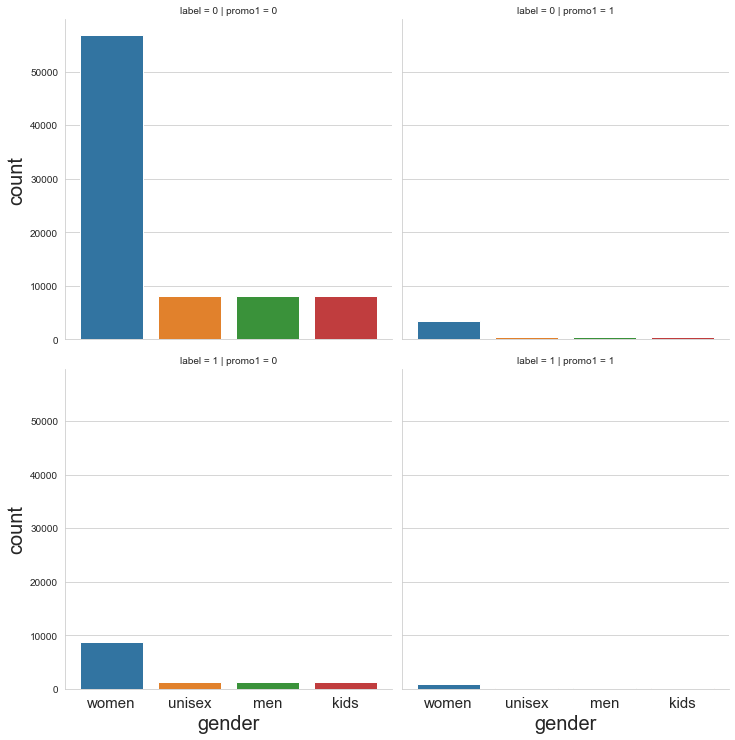

In [40]:
# Plot total no. of sold items with respect to gender and promo1
FacetGridCountPlot(DF = full_gen_data,
                   x = 'gender', 
                   col = 'promo1', 
                   row = 'label', 
                   xticks_size = 15, 
#                    yticks_size =20, 
                   labelSize = 20)

In [41]:
# Gender count with [label and promo1] columns
print('Promo 2')
get_counts_with_label_and_promo(full_gen_data, 'gender', 'label', 'promo2')

Promo 2


,count
women,85
unisex,13
men,9
kids,10
,count
women,9665
unisex,1413
men,1367
kids,1366
,count


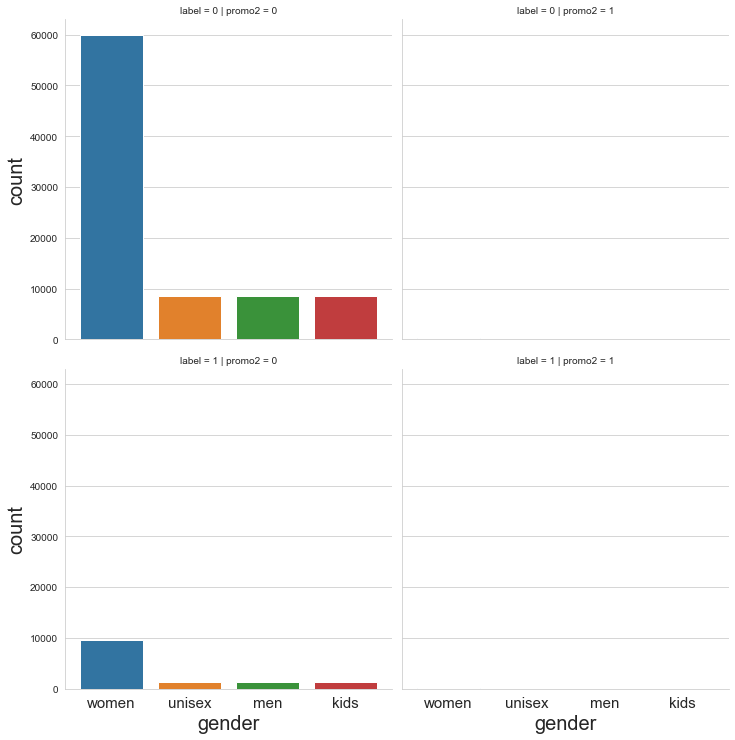

In [42]:
# Plot total no. of sold items with respect to gender and promo2
FacetGridCountPlot(DF = full_gen_data,
                   x = 'gender', 
                   col = 'promo2', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20)

## Explore product group

In [43]:
# Display total no. of sold items with each product group
get_counts(full_gen_data, 'productgroup', 'label' )

,productgroup,count,purchasing,No purchasing
1,SHOES,[60000],[8374],[51626]
0,HARDWARE ACCESSORIES,[20000],[2814],[17186]
2,SHORTS,[10000],[1351],[8649]
3,SWEATSHIRTS,[10000],[1389],[8611]


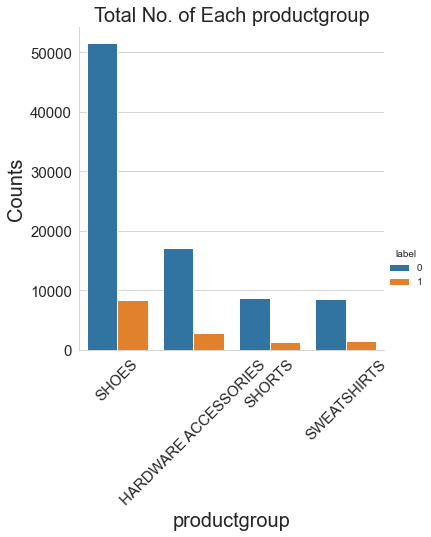

In [44]:
# Plot the count of each product with respect to label
countplot(full_gen_data, 'productgroup', 'label', rotation = 45)

In [45]:
# Product category count with [label and promo1] columns
print('Promo 1')
get_counts_with_label_and_promo(full_gen_data, 'productgroup', 'label', 'promo1')

Promo 1


,count
SHOES,814
HARDWARE ACCESSORIES,298
SHORTS,146
SWEATSHIRTS,139
,count
SHOES,7560
HARDWARE ACCESSORIES,2516
SHORTS,1205
SWEATSHIRTS,1250
,count


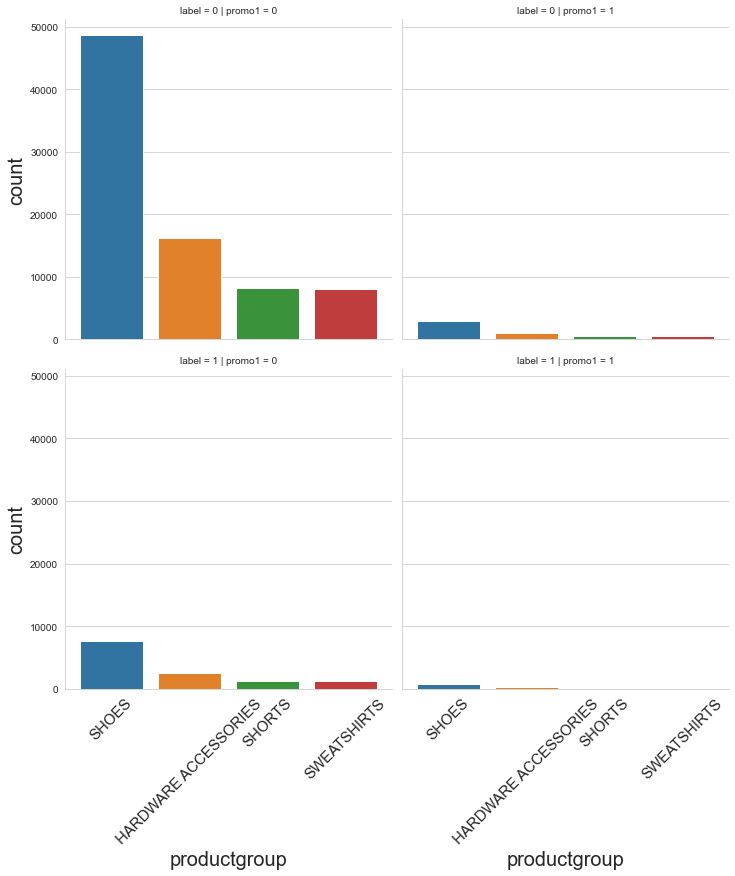

In [46]:
# Plot total no. of sold items with respect to product category and promo1
FacetGridCountPlot(DF = full_gen_data,
                   x = 'productgroup', 
                   col = 'promo1', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20, 
                  rotation = 45)

In [47]:
# Product category count with [label and promo1] columns
print('Promo 2')
get_counts_with_label_and_promo(full_gen_data, 'gender', 'label', 'promo2')

Promo 2


,count
women,85
unisex,13
men,9
kids,10
,count
women,9665
unisex,1413
men,1367
kids,1366
,count


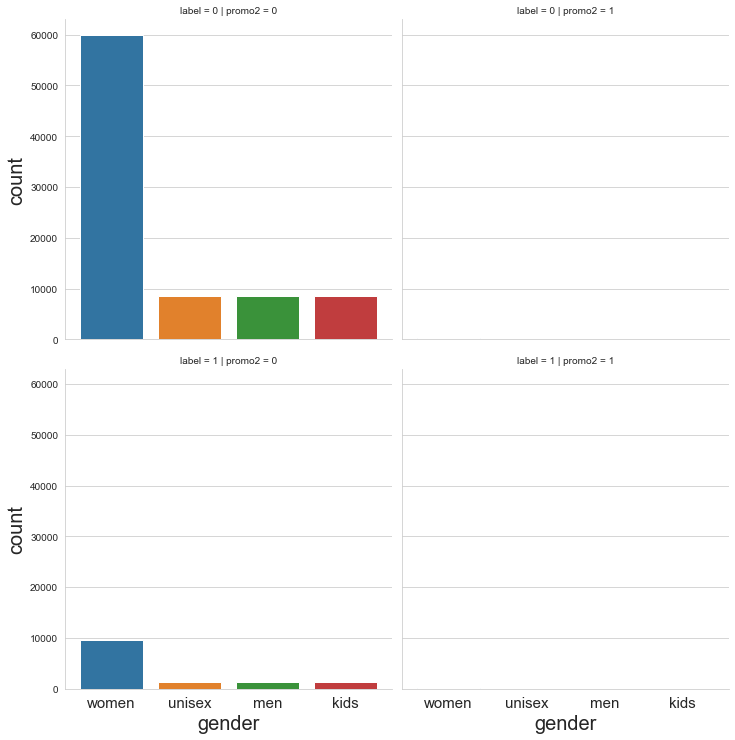

In [48]:
# Plot total no. of sold items with respect to gender and promo2
FacetGridCountPlot(DF = full_gen_data,
                   x = 'gender', 
                   col = 'promo2', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20)

## Explore style column

In [49]:
# Display total no. of sold items with each style
get_counts(full_gen_data, 'style', 'label' )

,style,count,purchasing,No purchasing
0,regular,[50000],[6987],[43013]
2,wide,[30000],[4163],[25837]
1,slim,[20000],[2778],[17222]


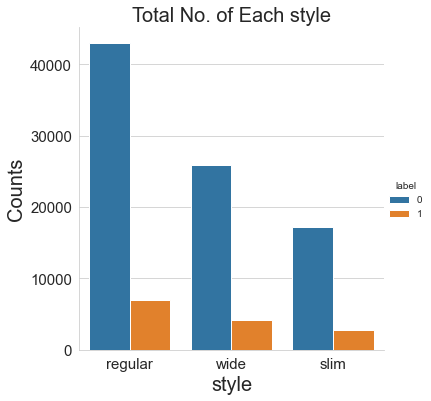

In [50]:
# Plot the count of each style with respect to label
countplot(full_gen_data, 'style', 'label')

In [51]:
# Product style count with [label and promo1] columns
print('Promo 1')
get_counts_with_label_and_promo(full_gen_data, 'style', 'label', 'promo1')

Promo 1


,count
regular,701
wide,424
slim,272
,count
regular,6286
wide,3739
slim,2506
,count
regular,40619
wide,24404


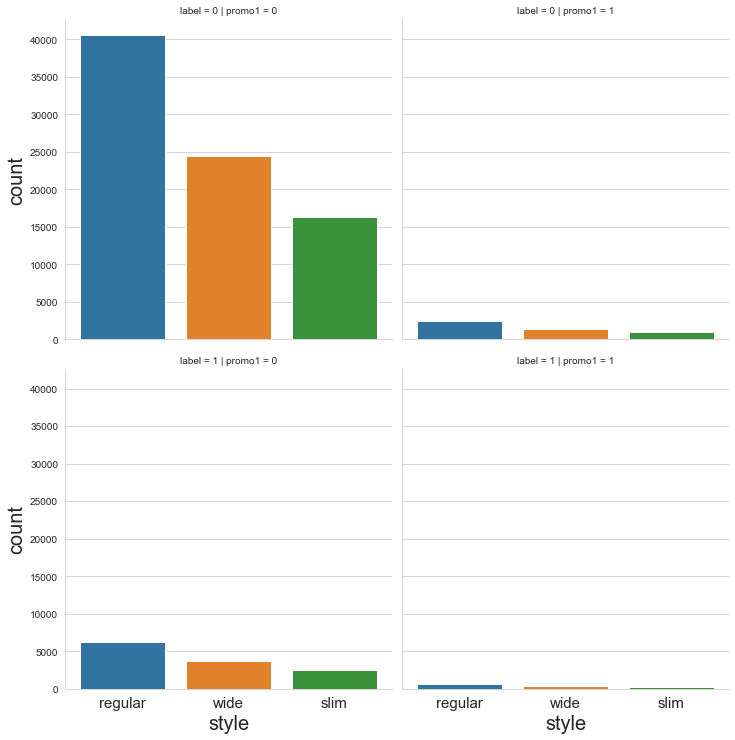

In [52]:
# Plot total no. of sold items with respect to product style and promo1
FacetGridCountPlot(DF = full_gen_data,
                   x = 'style', 
                   col = 'promo1', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20)

In [53]:
# Product style count with [label and promo1] columns
print('Promo 2')
get_counts_with_label_and_promo(full_gen_data, 'style', 'label', 'promo2')

Promo 2


,count
regular,57
wide,39
slim,21
,count
regular,6930
wide,4124
slim,2757
,count
regular,42825
wide,25729


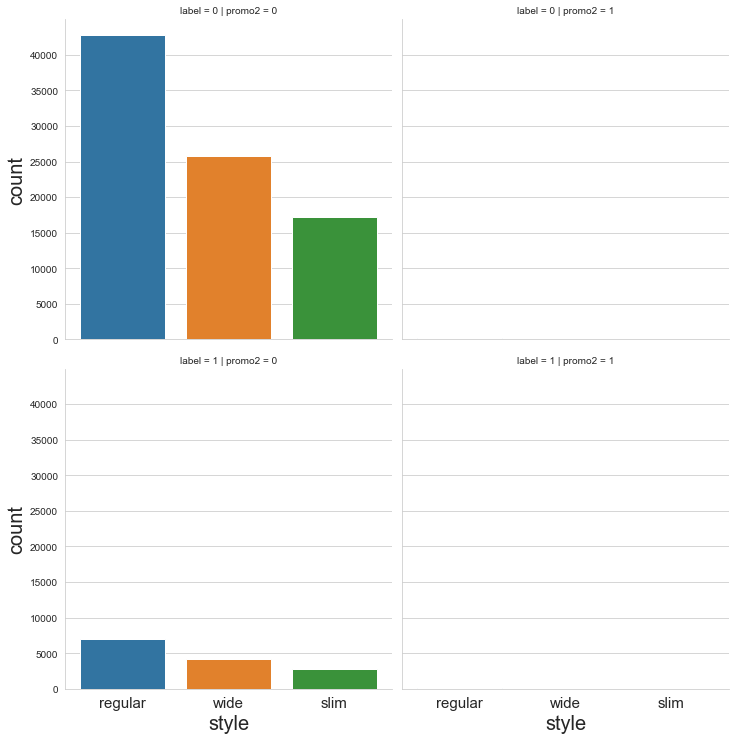

In [54]:
# Plot total no. of sold items with respect to product style and promo2
FacetGridCountPlot(DF = full_gen_data,
                   x = 'style', 
                   col = 'promo2', 
                   row = 'label', 
                   xticks_size = 15, 
                   yticks_size =20, 
                   labelSize = 20)

##### ########################################################################################################################

# Conclusion

### As we saw from the EDA we can conclude the following :

#### 1) High purchasing rate country is "Germany"
#### 2) High purchasing rate gender is "Women"
#### 3) High purchasing rate product group is "Shoes"
#### 4) High purchasing rate category is "Training"
#### 5) High purchasing rate style is "Regular"

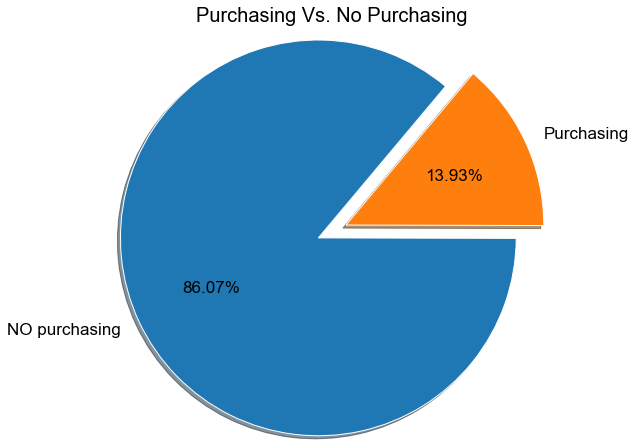

In [55]:
# Plot the overall % of purchasing
Total_purchasing = full_gen_data.groupby('label')['label'].count()
values = Total_purchasing.values
piechart(values, ['NO purchasing', 'Purchasing'], "Purchasing Vs. No Purchasing")

## Distribution of the 86.07 % of "no purchasing":

### Overall % of coustomers who did not purchase our products and did not recieve promo1

In [56]:
# Calculating the total number of customers who did not buy and did not recieve promo2
No_purchasing_no_promo1 = full_gen_data.loc[((full_gen_data['label']==0) & (full_gen_data['promo1']==0))]['label'].count()
Total_len_of_data = full_gen_data.shape[0]

print("The total number of customers is:(", No_purchasing_no_promo1, ") customer")
print("This number represents about ( {:.2%} ) of the data\t".format(No_purchasing_no_promo1/Total_len_of_data))

The total number of customers is:( 81279 ) customer
This number represents about ( 81.28% ) of the data	


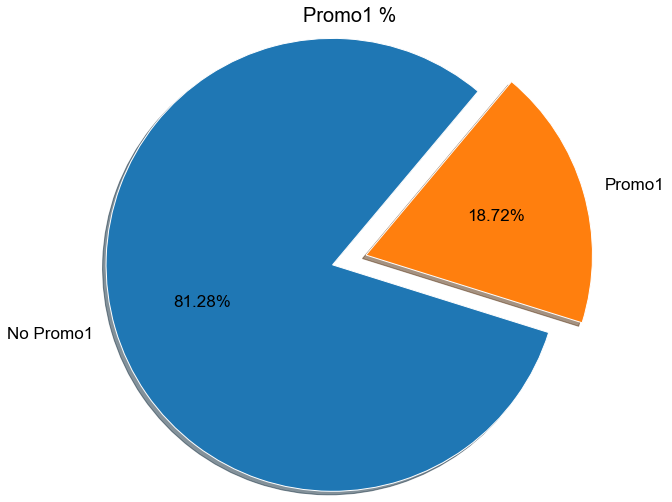

In [57]:
# Plot the % of promo1
values = [No_purchasing_no_promo1, (Total_len_of_data - No_purchasing_no_promo1)]
piechart(values, ['No Promo1', 'Promo1'], "Promo1 %")

In [58]:
# # Plot the count of each style with respect to label
# percentage = (No_purchasing_no_promo1/Total_len_of_data) *100
# spacific_countplot(full_gen_data, 'promo1', 'label', percentage)

### Overall % of coustomers who did not purchase our products and did not recieve promo2

In [59]:
# Calculating the total number of customers who did not buy and did not recieve promo2
No_purchasing_no_promo2 = full_gen_data.loc[((full_gen_data['label']==0) & (full_gen_data['promo2']==0))]['label'].count()
Total_len_of_data = full_gen_data.shape[0]

print("The total number of customers is:(", No_purchasing_no_promo2, ") customer")
print("This number represents about ( {:.2%} ) of the data\t".format(No_purchasing_no_promo2/Total_len_of_data))

The total number of customers is:( 85699 ) customer
This number represents about ( 85.70% ) of the data	


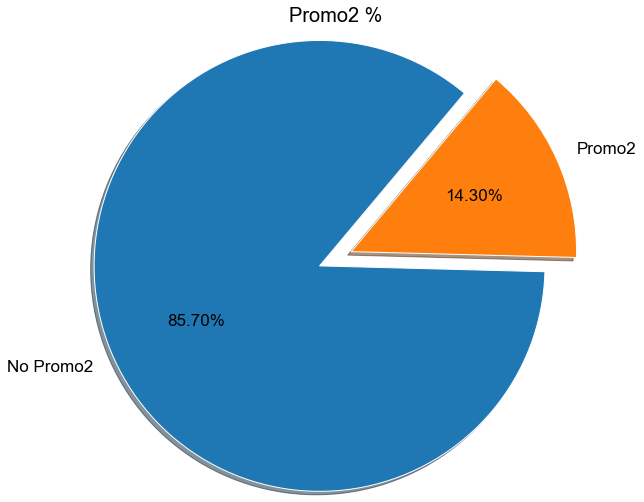

In [60]:
# Plot the % of promo1
values = [No_purchasing_no_promo2, (Total_len_of_data - No_purchasing_no_promo2)]
piechart(values, ['No Promo2', 'Promo2'], "Promo2 %")

### Overall % of coustomers who did not purchase our products and did not recieve promo1 and promo2

In [61]:
# Calculating the total number of customers who did not buy and did not recieve promo2
condition2 = ((full_gen_data['label']==0) & (full_gen_data['promo1']==0) & (full_gen_data['promo2']==0))
No_purchasing_no_promo2_promo1 = full_gen_data.loc[condition2]['label'].count()
Total_len_of_data = full_gen_data.shape[0]

print("The total number of customers is:(", No_purchasing_no_promo2_promo1, ") customer")
print("This number represents about ( {:.2%} ) of the data\t".format(No_purchasing_no_promo2_promo1/Total_len_of_data))

The total number of customers is:( 80974 ) customer
This number represents about ( 80.97% ) of the data	


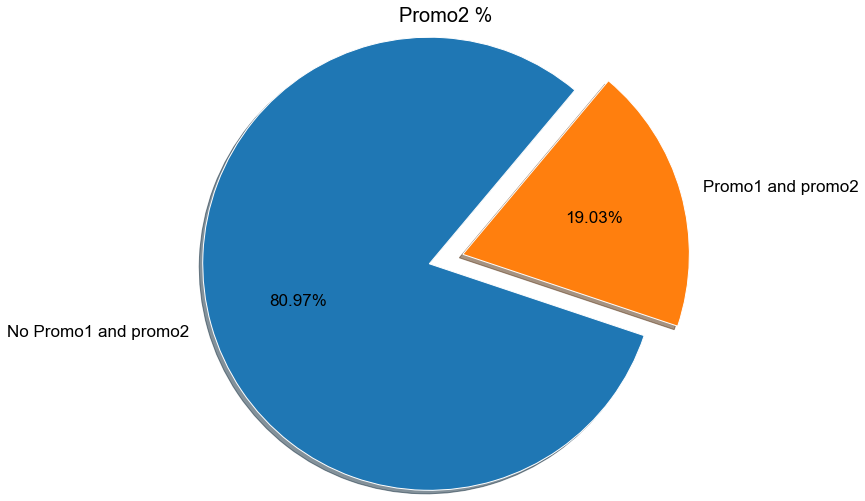

In [62]:
# Plot the % of promo1
values = [No_purchasing_no_promo2_promo1, (Total_len_of_data - No_purchasing_no_promo2_promo1)]
piechart(values, ['No Promo1 and promo2', 'Promo1 and promo2'], "Promo2 %")

## Best country, best gender, best style...etc

In [63]:
# # Plot the count of each style with respect to label
# percentage = (No_purchasing_no_promo2/Total_len_of_data) *100
# spacific_countplot(full_gen_data, 'promo2', 'label', percentage)

In [64]:
# Country with higher purchasing rate
Total_len_of_data = full_gen_data.shape[0]
Best_country = full_gen_data.loc[full_gen_data['label']==1]['country'].value_counts().sort_values(ascending=False)

print("The higher purchasing rate country is:", Best_country.index[0])
print("The Total no. of purchasing is:", Best_country.values[0])
print("It represents about ( {:.2%} ) of the data\t".format(Best_country.values[0]/Total_len_of_data))
print("and about ( {:.2%} ) of purchasing\t".format(Best_country.values[0]/(Best_country.values.sum())))

The higher purchasing rate country is: Germany
The Total no. of purchasing is: 6837
It represents about ( 6.84% ) of the data	
and about ( 49.09% ) of purchasing	


#### Germany is the higher purchasing rate country

In [65]:
# print(Best_country.index)

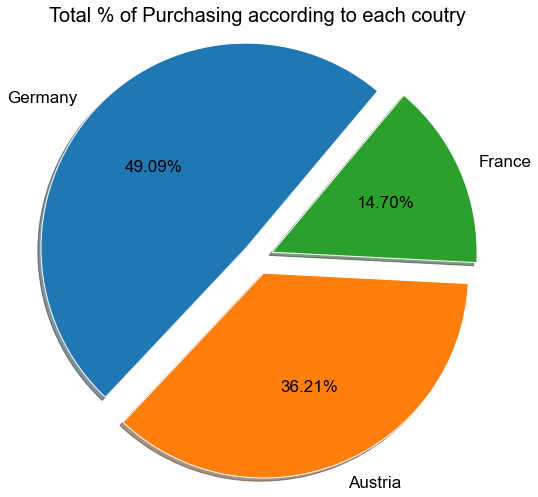

In [66]:
# Plot the % of countries accourding to purchasing = 1
title = 'Total % of Purchasing according to each coutry'
piechart(Best_country.values, Best_country.index, title, explode = [0.1,0.1,0.1], pad=40)

In [67]:
# Gender with higher purchasing rate
Total_len_of_data = full_gen_data.shape[0]
Best_gender = full_gen_data.loc[full_gen_data['label']==1]['gender'].value_counts().sort_values(ascending=False)

print("The higher purchasing rate gender is:", Best_gender.index[0])
print("The Total no. of purchasing is:", Best_gender.values[0])
print("It represents about ( {:.2%} ) of the data\t".format(Best_gender.values[0]/Total_len_of_data))
print("and about ( {:.2%} ) of purchasing\t".format(Best_gender.values[0]/(Best_gender.values.sum())))


The higher purchasing rate gender is: women
The Total no. of purchasing is: 9750
It represents about ( 9.75% ) of the data	
and about ( 70.00% ) of purchasing	


#### Women is the higher purchasing rate gender

In [68]:
# Best_gender.index

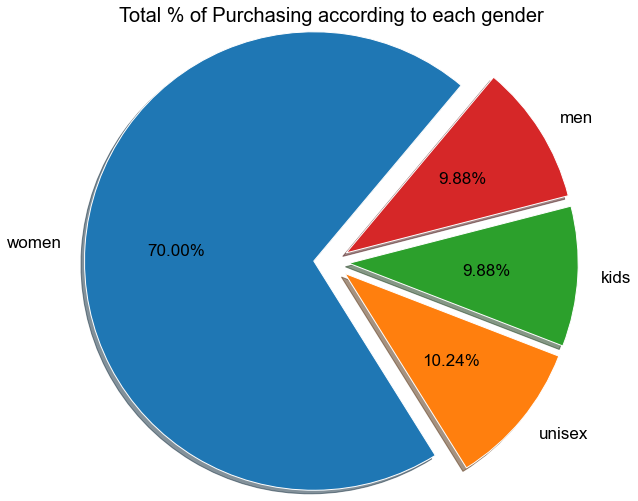

In [69]:
# Plot the % of gender accourding to purchasing = 1
title = 'Total % of Purchasing according to each gender'
piechart(Best_gender.values, Best_gender.index, title, explode = [0.1,0.1,0.1,0.1])


In [70]:
# Product group with higher purchasing rate
Total_len_of_data = full_gen_data.shape[0]
Best_productgroup = full_gen_data.loc[full_gen_data['label']==1]['productgroup'].value_counts().sort_values(ascending=False)

print("The higher purchasing rate product group is:", Best_productgroup.index[0])
print("The Total no. of purchasing is:", Best_productgroup.values[0])
print("It represents about ( {:.2%} ) of the data\t".format(Best_productgroup.values[0]/Total_len_of_data))
print("and about ( {:.2%} ) of purchasing\t".format(Best_productgroup.values[0]/(Best_productgroup.values.sum())))


The higher purchasing rate product group is: SHOES
The Total no. of purchasing is: 8374
It represents about ( 8.37% ) of the data	
and about ( 60.12% ) of purchasing	


#### Shoes are the higher purchasing rate prouduct group

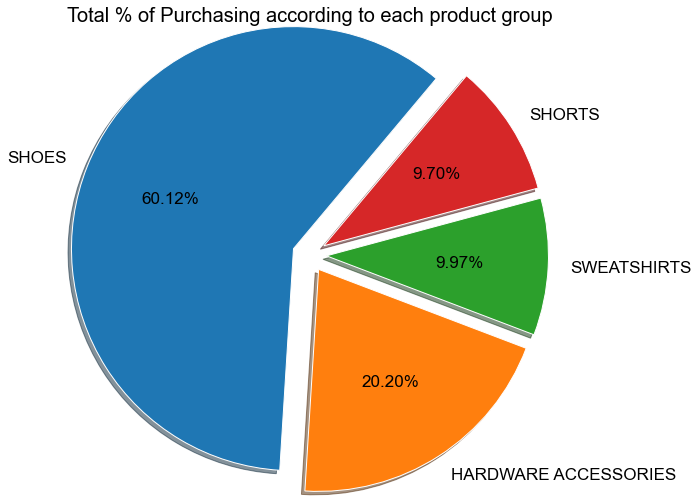

In [71]:
# Plot the % of product group accourding to purchasing = 1
title = 'Total % of Purchasing according to each product group'
piechart(Best_productgroup.values, Best_productgroup.index, title, explode = [0.1,0.1,0.1,0.1])


In [72]:
# Category with higher purchasing rate
Total_len_of_data = full_gen_data.shape[0]
Best_category = full_gen_data.loc[full_gen_data['label']==1]['category'].value_counts().sort_values(ascending=False)

print("The higher purchasing rate product group is:", Best_category.index[0])
print("The Total no. of purchasing is:", Best_category.values[0])
print("It represents about ( {:.2%} ) of the data\t".format(Best_category.values[0]/Total_len_of_data))
print("and about ( {:.2%} ) of purchasing\t".format(Best_category.values[0]/(Best_category.values.sum())))

The higher purchasing rate product group is: TRAINING
The Total no. of purchasing is: 4121
It represents about ( 4.12% ) of the data	
and about ( 29.59% ) of purchasing	


#### Training is the higher purchasing rate categorry

In [73]:
# Best_category.index

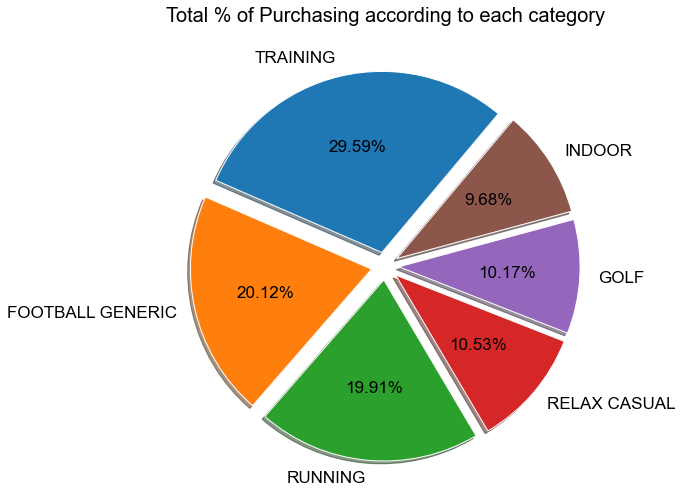

In [74]:
# Plot the % of category accourding to purchasing = 1
title = 'Total % of Purchasing according to each category'
piechart(Best_category.values, Best_category.index, title, explode = [0.1,0.1,0.1, 0.1, 0.1, 0.1], pad=70)

In [75]:
# Style with higher purchasing rate
Total_len_of_data = full_gen_data.shape[0]
Best_style = full_gen_data.loc[full_gen_data['label']==1]['style'].value_counts().sort_values(ascending=False)

print("The higher purchasing rate style is:", Best_style.index[0])
print("The Total no. of purchasing is:", Best_style.values[0])
print("It represents about ( {:.2%} ) of the data\t".format(Best_style.values[0]/Total_len_of_data))
print("and about ( {:.2%} ) of purchasing\t".format(Best_style.values[0]/(Best_style.values.sum())))

The higher purchasing rate style is: regular
The Total no. of purchasing is: 6987
It represents about ( 6.99% ) of the data	
and about ( 50.17% ) of purchasing	


#### Regular is the higher purchasing rate style

In [76]:
# Best_style.index

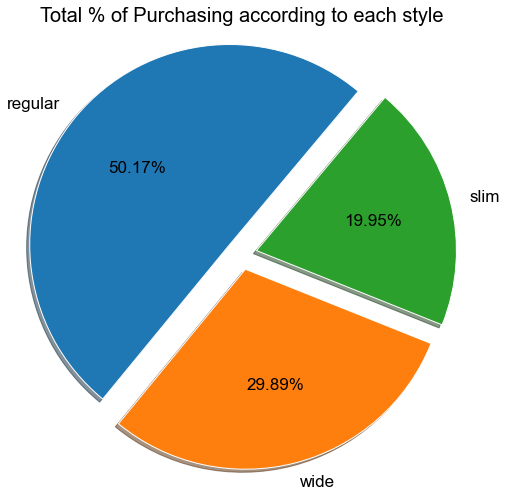

In [77]:
# Plot the % of style accourding to purchasing = 1
title = 'Total % of Purchasing according to each style'
piechart(Best_style.values, Best_style.index, title, explode = [0.1,0.1,0.1], pad=40)

In [78]:
# Month with higher purchasing rate
Total_len_of_data = full_gen_data.shape[0]
Best_month = full_gen_data.loc[full_gen_data['label']==1]['month'].value_counts().sort_values(ascending=False)

print("The higher purchasing rate month is:", Best_month.index[0])
print("The Total no. of purchasing is:", Best_month.values[0])
print("It represents about ( {:.2%} ) of the data\t".format(Best_month.values[0]/Total_len_of_data))
print("and about ( {:.2%} ) of purchasing\t".format(Best_month.values[0]/(Best_month.values.sum())))

The higher purchasing rate month is: 1
The Total no. of purchasing is: 3384
It represents about ( 3.38% ) of the data	
and about ( 24.30% ) of purchasing	


#### Jan is the higher purchasing rate month

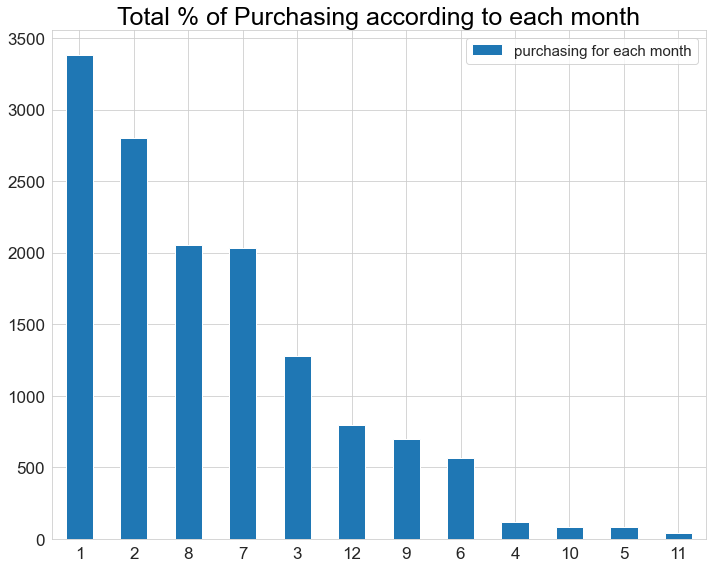

In [79]:
# Plot the % of month accourding to purchasing = 1
Best_month.plot(kind='bar', figsize=(10,8), fontsize=17, rot=0, label='purchasing for each month')
plt.title('Total % of Purchasing according to each month', fontsize=25, color='black')
plt.legend(fontsize=15, loc='best')
plt.show()

In [80]:
# Day with higher purchasing rate
Total_len_of_data = full_gen_data.shape[0]
Best_day = full_gen_data.loc[full_gen_data['label']==1]['day'].value_counts().sort_values(ascending=False)

print("The higher purchasing rate style is:", Best_day.index[0])
print("The Total no. of purchasing is:", Best_day.values[0])
print("It represents about ( {:.2%} ) of the data\t".format(Best_day.values[0]/Total_len_of_data))
print("and about ( {:.2%} ) of purchasing\t".format(Best_day.values[0]/(Best_day.values.sum())))

The higher purchasing rate style is: 1
The Total no. of purchasing is: 702
It represents about ( 0.70% ) of the data	
and about ( 5.04% ) of purchasing	


#### "1" is the higher purchasing rate day

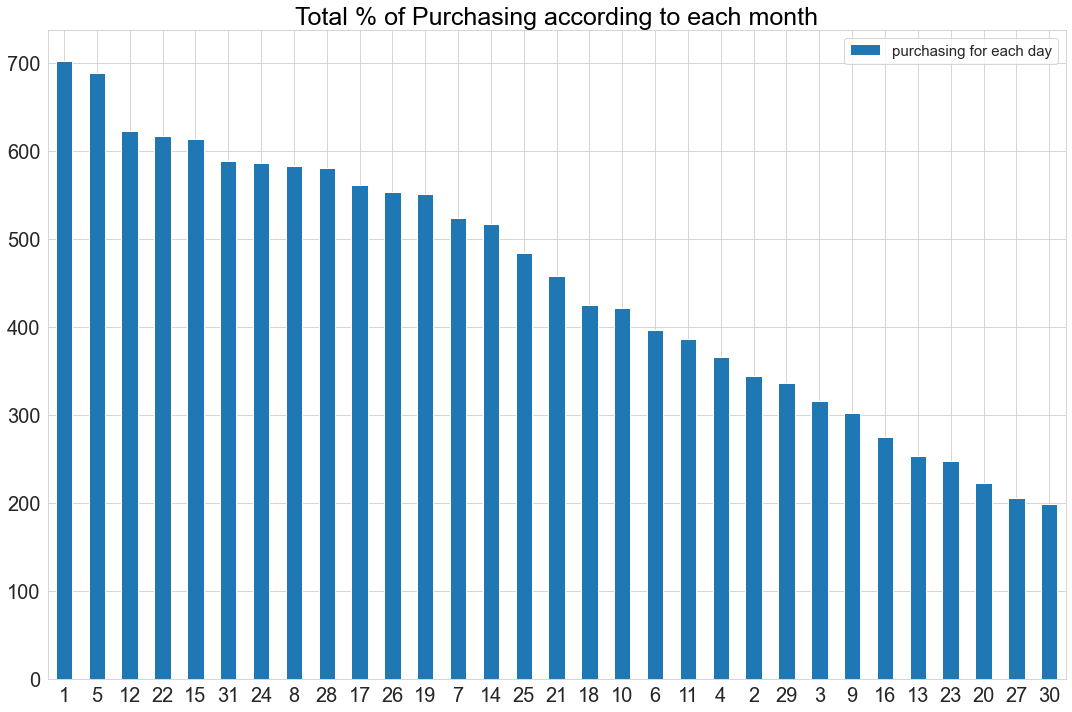

In [81]:
# Plot the % of month accourding to purchasing = 1
Best_day.plot.bar(figsize=(15,10), fontsize=20, rot=0, label='purchasing for each day')
plt.title('Total % of Purchasing according to each day', fontsize=25, color='black')
plt.legend(fontsize=15, loc='best')
plt.show()

##### #########################################################################################################################

# Model

## Preprocessing

In [82]:
# ALl features
full_gen_data.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')

In [83]:
# Extract the categorical columns 
dTypes = full_gen_data.dtypes 

# Make a list of categorical columns
Categorical_columns = list(dTypes[dTypes == 'object'].index)

# Print the results
print(Categorical_columns)

# Remove undesired columns
Categorical_columns.remove('article')
Categorical_columns.remove('article.1')
Categorical_columns.remove('sizes')

# Categorical_columns.remove('customer_id')
# Categorical_columns.remove('sizes_xxs,xs,s,m,l,xl,xxl')
print(Categorical_columns)

['country', 'article', 'article.1', 'productgroup', 'category', 'style', 'sizes', 'gender']
['country', 'productgroup', 'category', 'style', 'gender']


In [84]:
# Encode the categorical columns (Dummy encoding)
full_gen_data = pd.get_dummies(full_gen_data, columns = Categorical_columns, drop_first = True)

In [85]:
full_gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   article                   100000 non-null  object        
 1   sales                     100000 non-null  int64         
 2   regular_price             100000 non-null  float64       
 3   current_price             100000 non-null  float64       
 4   ratio                     100000 non-null  float64       
 5   retailweek                100000 non-null  datetime64[ns]
 6   promo1                    100000 non-null  int64         
 7   promo2                    100000 non-null  int64         
 8   customer_id               100000 non-null  float64       
 9   article.1                 100000 non-null  object        
 10  cost                      100000 non-null  float64       
 11  sizes                     100000 non-null  object        
 12  rgb

In [86]:
full_gen_data.columns

Index(['article', 'sales', 'regular_price', 'current_price', 'ratio',
       'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1', 'cost',
       'sizes', 'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col',
       'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col', 'label', 'year',
       'month', 'day', 'dayofweek', 'country_France', 'country_Germany',
       'productgroup_SHOES', 'productgroup_SHORTS', 'productgroup_SWEATSHIRTS',
       'category_GOLF', 'category_INDOOR', 'category_RELAX CASUAL',
       'category_RUNNING', 'category_TRAINING', 'style_slim', 'style_wide',
       'gender_men', 'gender_unisex', 'gender_women'],
      dtype='object')

In [87]:
Features = [ 
#     'article', 
            'sales', 'regular_price', 'current_price', 'ratio',
#        'retailweek',
       'promo1', 'promo2', 
#        'customer_id', 
#             'article.1', 
            'cost',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 
       'label', 
       'year', 'month', 'day',
    
#        'dayofweek', 
       'country_France', 'country_Germany', 'productgroup_SHOES',
       'productgroup_SHORTS', 'productgroup_SWEATSHIRTS', 'category_GOLF',
       'category_INDOOR', 'category_RELAX CASUAL', 'category_RUNNING',
       'category_TRAINING', 'style_slim', 'style_wide',
#        'sizes_xxs,xs,s,m,l,xl,xxl', 
      'gender_men', 'gender_unisex',
       'gender_women'
]

In [88]:
x = full_gen_data.copy()
y = x['label']

x = x[Features]
x = x.drop('label', axis=1)

In [89]:
# Split data 
from sklearn.model_selection import train_test_split
X_Train, X_Valid, Y_Train, Y_Valid = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42, stratify = y)

In [90]:
X_Train.head()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,year,month,day,country_France,country_Germany,productgroup_SHOES,productgroup_SHORTS,productgroup_SWEATSHIRTS,category_GOLF,category_INDOOR,category_RELAX CASUAL,category_RUNNING,category_TRAINING,style_slim,style_wide,gender_men,gender_unisex,gender_women
5258,169,62.95,18.95,0.301033,0,0,1.29,181,181,181,205,155,155,2017,4,16,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
19725,99,65.95,36.95,0.560273,1,0,4.20,79,148,205,164,211,238,2015,7,12,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
26973,36,51.95,15.95,0.307026,0,0,9.00,205,140,149,164,211,238,2015,10,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
90678,13,90.95,58.95,0.648158,0,0,1.29,181,181,181,205,155,155,2015,1,18,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
29742,24,97.95,80.95,0.826442,0,0,1.70,205,173,0,255,187,255,2015,8,9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [91]:
# ALL models accuracy, precesion, and recall
ALL_Train_Accuracy = []
ALL_Valid_Accuracy = []
ALL_Models = []
ALL_Precesion = []
ALL_Recall = []

# 1. KNeighborsClassifier

In [92]:
# Intiate a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit over training data
knn.fit(X_Train, Y_Train);

In [93]:
Knn_pred = knn.predict(X_Valid)

In [94]:
#### Model Evaluation
knn_Train_accuracy = knn.score(X_Train, Y_Train)
knn_Valid_accuracy = metrics.accuracy_score(Y_Valid, Knn_pred)
knn_precesion = metrics.precision_score(Y_Valid, Knn_pred)
knn_recall = metrics.recall_score(Y_Valid, Knn_pred)

# Print result
print("Validation accuracy:", knn_Valid_accuracy)
print("Training accuracy:", knn_Train_accuracy)
print("Precision:", knn_precesion)
print("Recall:", knn_recall)

Validation accuracy: 0.8429333333333333
Training accuracy: 0.8838
Precision: 0.364741641337386
Recall: 0.1723312589755864


#### As we see from precision and recall, the model predictions of the +ve class are not good

In [95]:
thresholds = [0, 0.01, 0.1, 0.2, 0.25, 0.4, 0.45, 0.5, 0.6, 0.7]
Accuracy=[]
Precision=[]
Recal=[]
for threshold in thresholds:
    preds = np.where(knn.predict_proba(X_Valid)[:,1] > threshold, 1, 0)
    Accuracy.append(metrics.accuracy_score(Y_Valid, preds))
    Precision.append(metrics.precision_score(Y_Valid, preds))
    Recal.append(metrics.recall_score(Y_Valid, preds))  

In [96]:
Results= {'Threshold': thresholds, 'Accuracy': Accuracy, 'Precesion': Precision, 'Recall': Recal}
Results_df = pd.DataFrame(Results)
Results_df

,Threshold,Accuracy,Precesion,Recall
0,0.00,0.674200,0.268186,0.774773
1,0.01,0.674200,0.268186,0.774773
2,0.10,0.674200,0.268186,0.774773
3,0.20,0.792267,0.318294,0.430589
4,0.25,0.792267,0.318294,0.430589
5,0.40,0.842933,0.364742,0.172331
6,0.45,0.842933,0.364742,0.172331
7,0.50,0.842933,0.364742,0.172331
8,0.60,0.857000,0.372727,0.039253
9,0.70,0.857000,0.372727,0.039253


##### We interested more in the correct prediction of the +ve class, so we will choose threshold of 0.2

In [97]:
#### Model Evaluation
# Validation prediction
THRESHOLD = 0.2
Train_predic = np.where(knn.predict_proba(X_Train)[:,1] > THRESHOLD, 1, 0)
Valid_predic = np.where(knn.predict_proba(X_Valid)[:,1] > THRESHOLD, 1, 0)

# Metrics
knn_Train_accuracy = metrics.accuracy_score(Y_Train, Train_predic)
knn_Valid_accuracy = metrics.accuracy_score(Y_Valid, Valid_predic)
knn_precesion = metrics.precision_score(Y_Valid, Valid_predic)
knn_recall = metrics.recall_score(Y_Valid, Valid_predic)

# Print result
print("Training accuracy:", knn_Train_accuracy)
print("Validation accuracy:", knn_Valid_accuracy)
print("Precision:", knn_precesion)
print("Recall:", knn_recall)

Training accuracy: 0.8657571428571429
Validation accuracy: 0.7922666666666667
Precision: 0.3182944090587403
Recall: 0.4305887984681666


In [98]:
# Add knn results
ALL_Train_Accuracy.append(knn_Train_accuracy)
ALL_Valid_Accuracy.append(knn_Valid_accuracy)
ALL_Precesion.append(knn_precesion)
ALL_Recall.append(knn_recall)
ALL_Models.append('KNN')

#### Hyper parameter tuning

In [99]:
# Let's implement Elbow method (to choose best k)
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_Train, Y_Train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_Train, Y_Train)

    #Compute accuracy on the validation set
    test_accuracy[i] = knn.score(X_Valid, Y_Valid)

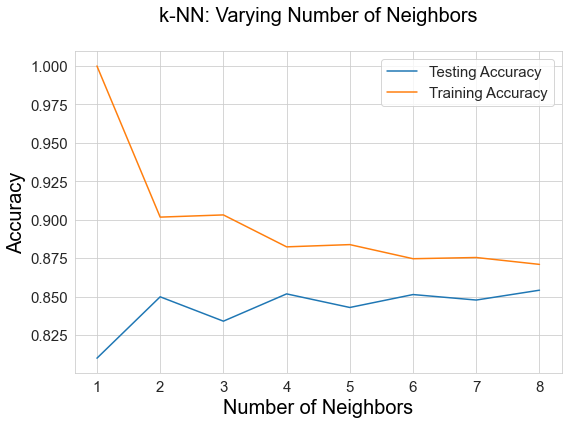

In [100]:
# Generate plot
plt.figure(figsize=(8,6))
plt.title('k-NN: Varying Number of Neighbors', fontsize=20, color='Black', pad=30)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend(fontsize=15)
plt.xlabel('Number of Neighbors', fontsize=20, color='Black')
plt.ylabel('Accuracy', fontsize=20, color='Black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#### Neighbours = 4 is the best 

## Try gradient search with KNN

In [101]:
# # Let's implement gridsearch for choosing best distance metric
# # Metrics list to search
# metrics = ['cosine', 'manhattan', 'euclidean']

# # Setup the parameters and distributions to sample from: param_dist
# param_dist = {"n_neighbors":list(range(1,9)),
#               "metric": metrics}

# # Instantiate grid search object
# knn_gs = GridSearchCV(knn, param_dist, cv=5)

In [102]:
# # Fit the GridSearchCV object
# knn_gs.fit(x, y)

In [103]:
# # Print the tuned parameters and score
# print("Tuned KNN Parameters: {}".format(knn_gs.best_params_))
# print("Best score is {}".format(knn_gs.best_score_))

In [104]:
# print("Train accuracy: ", knn_gs.score(X_Train, Y_Train))
# print("Validation accuracy: ", knn_gs.score(X_Valid, Y_Valid))

# 2. SVC

In [105]:
# Intialize SVC
svclassifier = SVC(kernel='linear', 
#                    gamma='scale', 
#                    probability=True
                  )

In [106]:
# Fit the training data
svclassifier.fit(X_Train, Y_Train)

SVC(kernel='linear')

In [107]:
# Use classifier to make predictions
SVCpred = svclassifier.predict(X_Valid)

In [108]:
#### Model Evaluation
svc_Train_accuracy = svclassifier.score(X_Train, Y_Train)
svc_Valid_accuracy = metrics.accuracy_score(Y_Valid, SVCpred)
svc_precesion = metrics.precision_score(Y_Valid, SVCpred)
svc_recall = metrics.recall_score(Y_Valid, SVCpred)

# Print result
print("Training accuracy:", svc_Train_accuracy)
print("Validation accuracy:", svc_Valid_accuracy)
print("Precision:", svc_precesion)
print("Recall:", svc_recall)

Training accuracy: 0.8585857142857143
Validation accuracy: 0.8588666666666667
Precision: 0.46382428940568476
Recall: 0.08592628051699377


In [109]:
# Print classification report and confusion matrix
print(confusion_matrix(Y_Valid,SVCpred), end='\n\n\n')
print(classification_report(Y_Valid,SVCpred))

[[25407   415]
 [ 3819   359]]


              precision    recall  f1-score   support

           0       0.87      0.98      0.92     25822
           1       0.46      0.09      0.14      4178

    accuracy                           0.86     30000
   macro avg       0.67      0.53      0.53     30000
weighted avg       0.81      0.86      0.81     30000



In [110]:
# Add svc results
ALL_Train_Accuracy.append(svc_Train_accuracy)
ALL_Valid_Accuracy.append(svc_Valid_accuracy)
ALL_Precesion.append(svc_precesion)
ALL_Recall.append(svc_recall)
ALL_Models.append('SVC')

#### As we see from precision and recall, the model predictions of the +ve class are not good

#### Hyper parameters tuning

In [111]:
# thresholds1 = [0, 0.01, 0.1, 0.2, 0.25, 0.4, 0.45, 0.5, 0.6, 0.7]
# Accuracy1=[]
# Precision1=[]
# Recal1=[]
# for threshold in thresholds1:
#     preds1 = np.where(svclassifier.predict_proba(X_Valid)[:,1] > threshold, 1, 0)
#     Accuracy1.append(metrics.accuracy_score(Y_Valid, preds1))
#     Precision1.append(metrics.precision_score(Y_Valid, preds1))
#     Recal1.append(metrics.recall_score(Y_Valid, preds1))  

In [112]:
# Results= {'Threshold': thresholds1, 'Accuracy': Accuracy1, 'Precesion': Precision1, 'Recall': Recal1}
# Results_df = pd.DataFrame(Results)
# Results_df

In [113]:
# #### Model Evaluation
# # Validation prediction
# THRESHOLD = 0.2
# Train_predic = np.where(svclassifier.predict_proba(X_Train)[:,1] > THRESHOLD, 1, 0)
# Valid_predic = np.where(svclassifier.predict_proba(X_Valid)[:,1] > THRESHOLD, 1, 0)

# #### Model Evaluation
# svc_Train_accuracy = svclassifier.score(X_Train, Y_Train)
# svc_Valid_accuracy = metrics.accuracy_score(Y_Valid, Valid_predic)
# svc_precesion = metrics.precision_score(Y_Valid, Valid_predic)
# svc_recall = metrics.recall_score(Y_Valid, Valid_predic)

# # Print result
# print("Training accuracy:", svc_Train_accuracy)
# print("Validation accuracy:", svc_Valid_accuracy)
# print("Precision:", svc_precesion)
# print("Recall:", svc_recall)

In [114]:
# # Add svc results
# ALL_Train_Accuracy.append(svc_Train_accuracy)
# ALL_Valid_Accuracy.append(svc_Valid_accuracy)
# ALL_Precesion.append(svc_precesion)
# ALL_Recall.append(svc_recall)
# ALL_Models.append('SVC')

## Try grediant search with SVC

In [115]:
# # Let's try different kernels with GridSearch
# param_dist = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
#              'C': [0.01, 0.1, 0.5, 1, 3, 7]}
# # Intiate GridSearch
# svm_gs = GridSearchCV(svclassifier, param_dist, cv=5)

In [116]:
# svm_gs.fit(X_Train, Y_Train)

In [117]:
# # Print the tuned parameters and score
# print("Tuned SVM Parameters: {}".format(svm_gs.best_params_))
# print("Best score is {}".format(svm_gs.best_score_))

In [118]:
# print("Train accuracy: ", svm_gs.score(X_Train, Y_Train))
# print("Validation accuracy: ", svm_gs.score(X_Valid, Y_Valid))

# Logistic regression

In [119]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(
#                             solver='lbfgs', 
                            max_iter=1000, 
                            C=100 # C parameter for regularization. Lower C higher regularization
#                             penalty ='l1'
                           )

# fit the model with data
logreg.fit(X_Train,Y_Train)

LogisticRegression(C=100, max_iter=1000)

In [120]:
# Predict the test values
loggpred=logreg.predict(X_Valid)

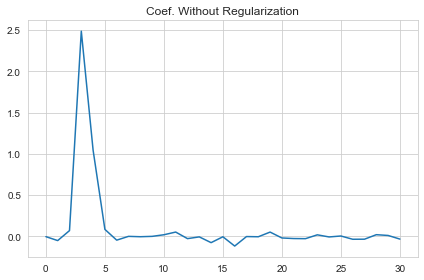

In [121]:
# Coef without C (regularization)
plt.plot(logreg.coef_.flatten())
plt.title('Coef. Without Regularization')
plt.show()

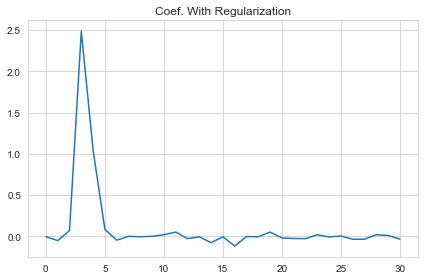

In [122]:
# Coef with C (regularization)
plt.plot(logreg.coef_.flatten())
plt.title('Coef. With Regularization')
plt.show()

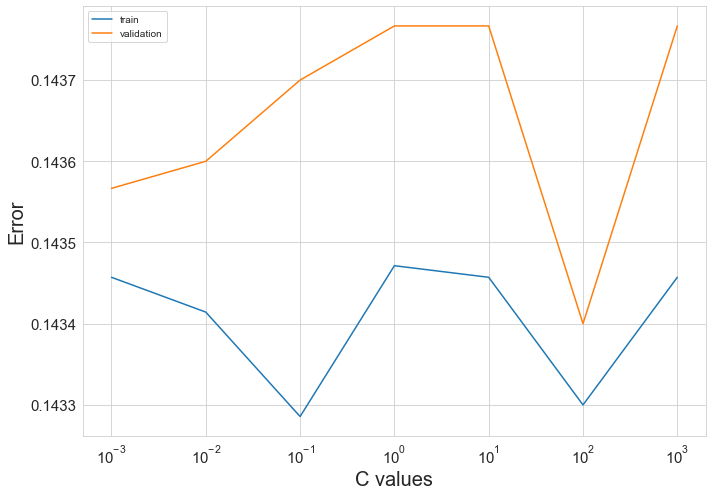

In [123]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_Train, Y_Train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_Train, Y_Train) )
    valid_errs.append( 1.0 - lr.score(X_Valid, Y_Valid) )
    
# Plot results
fig = plt.figure(figsize =(10, 7));
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.xlabel('C values', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [124]:
# print("Validation score:", logreg.score(X_Valid, Y_Valid))

In [125]:
# logreg.classes_

In [126]:
# logreg.coef_

In [127]:
#### Model Evaluation
print("Train accuracy:",logreg.score(X_Train, Y_Train))
print("Validation accuracy:",metrics.accuracy_score(Y_Valid, loggpred))
print("Precision:",metrics.precision_score(Y_Valid, loggpred))
print("Recall:",metrics.recall_score(Y_Valid, loggpred))

Train accuracy: 0.8560285714285715
Validation accuracy: 0.8568666666666667
Precision: 0.4527687296416938
Recall: 0.1330780277644806


In [128]:
# Let's call the confusion matrix method
# print(X_Valid.shape[0])
cnf_matrix = metrics.confusion_matrix(Y_Valid, loggpred)
cnf_matrix

array([[25150,   672],
       [ 3622,   556]], dtype=int64)

Text(0.5, 568.3523542327397, 'Predicted label')

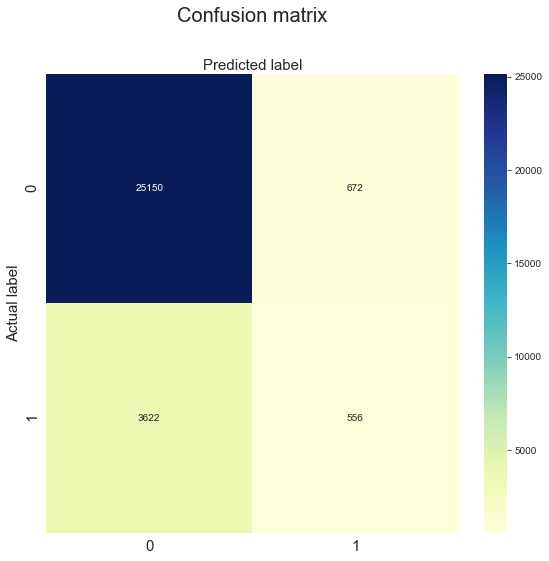

In [129]:
# name  of classes
class_names=[0,1] 

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=15)
plt.yticks(tick_marks, class_names, fontsize=15)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize=20)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label',fontsize=15)

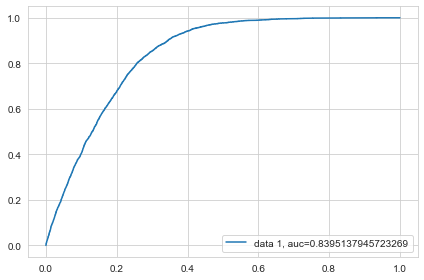

In [130]:
y_pred_proba = logreg.predict_proba(X_Valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_Valid,  y_pred_proba)
auc = metrics.roc_auc_score(Y_Valid,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### As we see, the model have a good accuracy but low recall and precision.. bad model

In [131]:
# Cross validation
cv_results = cross_validate(logreg, x, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1'))
# cv_results

In [132]:
cv_df = pd.DataFrame(cv_results)
cv_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,17.311075,0.076956,0.85672,0.856813,0.454044,0.459044,0.141872,0.157189,0.216193,0.234187
1,16.365619,0.062963,0.85864,0.856813,0.469484,0.449008,0.114877,0.123492,0.184587,0.193708
2,17.450005,0.044968,0.85512,0.856827,0.445483,0.455838,0.164273,0.144266,0.240034,0.219168
3,14.549664,0.046966,0.85600,0.856360,0.446168,0.453774,0.140437,0.153647,0.213630,0.229564


In [133]:
# # Now, you can easily see the average results for example
# cv_df.mean()

# x

In [134]:
# # Some people will be caring about the minimum value
# cv_df.min()

# x

In [135]:
# # Let's investigate
# y_pred_proba = logreg.predict_proba(X_Valid)[::,1]
# y_pred_proba

# x

In [136]:
thresholds = [0, 0.01, 0.1, 0.2, 0.25, 0.4, 0.45, 0.5, 0.6, 0.7]
Accuracy=[]
Precision=[]
Recal=[]
for threshold in thresholds:
    preds = np.where(logreg.predict_proba(X_Valid)[:,1] > threshold, 1, 0)
    Accuracy.append(metrics.accuracy_score(Y_Valid, preds))
    Precision.append(metrics.precision_score(Y_Valid, preds))
    Recal.append(metrics.recall_score(Y_Valid, preds))  

In [137]:
Results= {'Threshold': thresholds, 'Accuracy': Accuracy, 'Precesion': Precision, 'Recall': Recal}
Results_df = pd.DataFrame(Results)
Results_df

,Threshold,Accuracy,Precesion,Recall
0,0.00,0.139267,0.139267,1.000000
1,0.01,0.238600,0.154601,0.999761
2,0.10,0.676933,0.290819,0.917425
3,0.20,0.786500,0.356637,0.662997
4,0.25,0.811933,0.376435,0.533748
5,0.40,0.848733,0.425373,0.245572
6,0.45,0.853067,0.433832,0.180469
7,0.50,0.856867,0.452769,0.133078
8,0.60,0.859333,0.465461,0.067736
9,0.70,0.860533,0.489933,0.034945


In [138]:
#### Model Evaluation
# Validation prediction
THRESHOLD = 0.2
Train_predic = np.where(logreg.predict_proba(X_Train)[:,1] > THRESHOLD, 1, 0)
Valid_predic = np.where(logreg.predict_proba(X_Valid)[:,1] > THRESHOLD, 1, 0)

# Metrics
log_Train_accuracy = metrics.accuracy_score(Y_Train, Train_predic)
log_Valid_accuracy = metrics.accuracy_score(Y_Valid, Valid_predic)
log_precesion = metrics.precision_score(Y_Valid, Valid_predic)
log_recall = metrics.recall_score(Y_Valid, Valid_predic)

# Print result
print("Training accuracy:", log_Train_accuracy)
print("Validation accuracy:", log_Valid_accuracy)
print("Precision:", log_precesion)
print("Recall:", log_recall)

Training accuracy: 0.7927
Validation accuracy: 0.7865
Precision: 0.35663705420368225
Recall: 0.6629966491144088


In [139]:
# Add knn results
ALL_Train_Accuracy.append(log_Train_accuracy)
ALL_Valid_Accuracy.append(log_Valid_accuracy)
ALL_Precesion.append(log_precesion)
ALL_Recall.append(log_recall)
ALL_Models.append('Logistic')

In [140]:
# # Let's create our function that can change the threshold
# def predict_by_threshold(model, test_set , threshold):
#     import numpy as np
#     preds = np.where(model.predict_proba(test_set)[:,1] > threshold, 1, 0)
#     return preds 

# x

In [141]:
# # Let's see the output if the threshold was 0.7
# y_pred_th = predict_by_threshold(logreg, X_Valid, 0.7) 

# x

In [142]:
# print("Accuracy:",metrics.accuracy_score(Y_Valid, y_pred_th))
# print("Precision:",metrics.precision_score(Y_Valid, y_pred_th))
# print("Recall:",metrics.recall_score(Y_Valid, y_pred_th))

# x

# Naive bayes

In [143]:
# Intiate the model
naivebayes = GaussianNB()

In [144]:
# Fit the model
naivebayes.fit(X_Train, Y_Train)

GaussianNB()

In [145]:
naivePred = naivebayes.predict(X_Valid)

In [146]:
# # We can use the concept of cross validation here also 
# from sklearn.model_selection import cross_validate

# x

In [147]:
#### Model Evaluation
print("Train accuracy:",naivebayes.score(X_Train, Y_Train))
print("Validation accuracy:",metrics.accuracy_score(Y_Valid, naivePred))
print("Precision:",metrics.precision_score(Y_Valid, naivePred))
print("Recall:",metrics.recall_score(Y_Valid, naivePred))

Train accuracy: 0.8207714285714286
Validation accuracy: 0.8160666666666667
Precision: 0.3522927689594356
Recall: 0.38247965533748207


In [148]:
cv_results = pd.DataFrame(cross_validate(naivebayes, x, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1')))
cv_results

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.102943,0.049972,0.81956,0.819480,0.351857,0.359524,0.350948,0.378901,0.351402,0.368958
1,0.123928,0.129926,0.81512,0.817067,0.359329,0.360823,0.418150,0.406280,0.386514,0.382205
2,0.087930,0.052969,0.82120,0.821667,0.364435,0.363169,0.381390,0.372104,0.372720,0.367582
3,0.095944,0.120931,0.82004,0.820560,0.360033,0.364422,0.375646,0.387517,0.367674,0.375615


In [149]:
# Adjust display presion
pd.set_option("display.precision", 8)

# Using of predict 
naivebayes_predict = naivebayes.predict(X_Valid)
# Using of predict_proba
naivebayes_predict_proba = naivebayes.predict_proba(X_Valid)
# Generate a Dataframe
results = pd.DataFrame({'Actual': Y_Valid.tolist(), 
                      'Predicted Class': naivebayes_predict.tolist(), 
                      'Predicted Class Probapitiy': naivebayes_predict_proba[:, 1].tolist()})

In [150]:
# Print the head of the Actual vs. Predicted DataFrame
results.head(10)

,Actual,Predicted Class,Predicted Class Probapitiy
0,1,0,0.01925227
1,0,0,0.00059237
2,0,0,0.01096462
3,0,0,0.00900897
4,0,0,0.25148981
5,0,1,0.71713228
6,0,0,0.00013918
7,0,0,0.03800254
8,0,1,0.68987434
9,0,0,0.01292370


In [151]:
thresholds = [0, 0.01, 0.1, 0.2, 0.25, 0.4, 0.45, 0.5, 0.6, 0.7]
Accuracy=[]
Precision=[]
Recal=[]
for threshold in thresholds:
    preds = np.where(naivebayes.predict_proba(X_Valid)[:,1] > threshold, 1, 0)
    Accuracy.append(metrics.accuracy_score(Y_Valid, preds))
    Precision.append(metrics.precision_score(Y_Valid, preds))
    Recal.append(metrics.recall_score(Y_Valid, preds))  

In [152]:
Results= {'Threshold': thresholds, 'Accuracy': Accuracy, 'Precesion': Precision, 'Recall': Recal}
Results_df = pd.DataFrame(Results)
Results_df

,Threshold,Accuracy,Precesion,Recall
0,0.00,0.13926667,0.13926667,1.00000000
1,0.01,0.59093333,0.25153487,0.98061273
2,0.10,0.72313333,0.31607557,0.84897080
3,0.20,0.76030000,0.33366457,0.72331259
4,0.25,0.77366667,0.33979392,0.66299665
5,0.40,0.80276667,0.35047291,0.48779320
6,0.45,0.81096667,0.35502039,0.43752992
7,0.50,0.81606667,0.35229277,0.38247966
8,0.60,0.82636667,0.34992722,0.28769746
9,0.70,0.83446667,0.35120846,0.22259454


In [153]:
#### Model Evaluation
# Validation prediction
THRESHOLD = 0.2
Train_predic = np.where(naivebayes.predict_proba(X_Train)[:,1] > THRESHOLD, 1, 0)
Valid_predic = np.where(naivebayes.predict_proba(X_Valid)[:,1] > THRESHOLD, 1, 0)

# Metrics
naive_Train_accuracy = metrics.accuracy_score(Y_Train, Train_predic)
naive_Valid_accuracy = metrics.accuracy_score(Y_Valid, Valid_predic)
naive_precesion = metrics.precision_score(Y_Valid, Valid_predic)
naive_recall = metrics.recall_score(Y_Valid, Valid_predic)

# Print result
print("Training accuracy:", naive_Train_accuracy)
print("Validation accuracy:", naive_Valid_accuracy)
print("Precision:", naive_precesion)
print("Recall:", naive_recall)

Training accuracy: 0.7671571428571429
Validation accuracy: 0.7603
Precision: 0.33366456884177986
Recall: 0.7233125897558641


In [154]:
# Add knn results
ALL_Train_Accuracy.append(naive_Train_accuracy)
ALL_Valid_Accuracy.append(naive_Valid_accuracy)
ALL_Precesion.append(naive_precesion)
ALL_Recall.append(naive_recall)
ALL_Models.append('Naive')

# Decision tree

In [155]:
# Intiate the model
dtree = DecisionTreeClassifier()

# Fitting the Model 
dtree.fit(X_Train, Y_Train)

# Predict for testing
dtree_predict = dtree.predict(X_Valid)

# Print the accuracy
print('Decision Tree accuracy: ', metrics.accuracy_score(Y_Valid, dtree_predict))


Decision Tree accuracy:  0.8050666666666667


In [156]:
#### Model Evaluation
print("Train accuracy:",dtree.score(X_Train, Y_Train))
print("Validation accuracy:",metrics.accuracy_score(Y_Valid, dtree_predict))
print("Precision:",metrics.precision_score(Y_Valid, dtree_predict))
print("Recall:",metrics.recall_score(Y_Valid, dtree_predict))

Train accuracy: 0.9999
Validation accuracy: 0.8050666666666667
Precision: 0.31559187279151946
Recall: 0.34202967927237915


Text(0.5, 425.1156889264581, 'Predicted label')

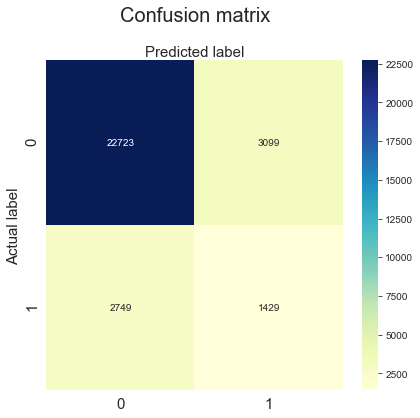

In [157]:
# Let's call the confusion matrix method
cnf_matrix = metrics.confusion_matrix(Y_Valid, dtree_predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6,6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=15)
plt.yticks(tick_marks, class_names, fontsize=15)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize=20)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)

In [158]:
cv_results = pd.DataFrame(cross_validate(dtree, x, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1')))
cv_results

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.24481797,0.07239890,0.80240,0.99984000,0.31015625,1.0,0.34204480,0.99885123,0.32532095,0.99942529
1,0.90421224,0.07126117,0.80920,0.99989333,0.31869369,1.0,0.32510052,0.99923416,0.32186523,0.99961693
2,0.65863276,0.04097629,0.80208,0.99990667,0.30411545,1.0,0.32682366,0.99932989,0.31506091,0.99966483
3,0.60141420,0.05996585,0.81328,0.99996000,0.32548558,1.0,0.31763354,0.99971281,0.32151163,0.99985638


In [159]:
thresholds = [0, 0.01, 0.1, 0.2, 0.25, 0.4, 0.45, 0.5, 0.6, 0.7]
Accuracy=[]
Precision=[]
Recal=[]
for threshold in thresholds:
    preds = np.where(dtree.predict_proba(X_Valid)[:,1] > threshold, 1, 0)
    Accuracy.append(metrics.accuracy_score(Y_Valid, preds))
    Precision.append(metrics.precision_score(Y_Valid, preds))
    Recal.append(metrics.recall_score(Y_Valid, preds))  

In [160]:
Results= {'Threshold': thresholds, 'Accuracy': Accuracy, 'Precesion': Precision, 'Recall': Recal}
Results_df = pd.DataFrame(Results)
Results_df

,Threshold,Accuracy,Precesion,Recall
0,0.00,0.80506667,0.31567329,0.34226903
1,0.01,0.80506667,0.31567329,0.34226903
2,0.10,0.80506667,0.31567329,0.34226903
3,0.20,0.80506667,0.31567329,0.34226903
4,0.25,0.80506667,0.31567329,0.34226903
5,0.40,0.80506667,0.31567329,0.34226903
6,0.45,0.80506667,0.31567329,0.34226903
7,0.50,0.80506667,0.31559187,0.34202968
8,0.60,0.80506667,0.31559187,0.34202968
9,0.70,0.80506667,0.31559187,0.34202968


In [161]:
#### Model Evaluation
# Validation prediction
THRESHOLD = 0.2
Train_predic = np.where(dtree.predict_proba(X_Train)[:,1] > THRESHOLD, 1, 0)
Valid_predic = np.where(dtree.predict_proba(X_Valid)[:,1] > THRESHOLD, 1, 0)

# Metrics
tree_Train_accuracy = metrics.accuracy_score(Y_Train, Train_predic)
tree_Valid_accuracy = metrics.accuracy_score(Y_Valid, Valid_predic)
tree_precesion = metrics.precision_score(Y_Valid, Valid_predic)
tree_recall = metrics.recall_score(Y_Valid, Valid_predic)

# Print result
print("Training accuracy:", tree_Train_accuracy)
print("Validation accuracy:", tree_Valid_accuracy)
print("Precision:", tree_precesion)
print("Recall:", log_recall)

Training accuracy: 0.9999
Validation accuracy: 0.8050666666666667
Precision: 0.31567328918322296
Recall: 0.6629966491144088


In [162]:
# Add knn results
ALL_Train_Accuracy.append(tree_Train_accuracy)
ALL_Valid_Accuracy.append(tree_Valid_accuracy)
ALL_Precesion.append(tree_precesion)
ALL_Recall.append(tree_recall)
ALL_Models.append('Tree')

# Extratrees

In [163]:
# Intiate the model
extra_tree = ExtraTreesClassifier(n_estimators=100)
# Fit the Model
extra_tree.fit(X_Train, Y_Train) 
# Predict for testing
extra_tree_predict = extra_tree.predict(X_Valid)
# Let's see the perforamce of our Model using the Cross Validation Method
cv_results_extra_tree = pd.DataFrame(cross_validate(extra_tree, x, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1')))
# View the results
cv_results_extra_tree.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,16.51852655,1.56610513,0.84580,0.99984000,0.36744847,1.0,0.14847789,0.99885123,0.21149519,0.99942529
1,11.80723286,1.04441929,0.84780,0.99989333,0.39021074,1.0,0.16484779,0.99923416,0.23177872,0.99961693
2,11.06465554,1.37821174,0.85064,0.99990667,0.40078740,1.0,0.14618036,0.99932989,0.21422559,0.99966483
3,11.04766631,0.81253576,0.84944,0.99996000,0.39555556,1.0,0.15336014,0.99971281,0.22102649,0.99985638


In [164]:
#### Model Evaluation
print("Train accuracy:",extra_tree.score(X_Train, Y_Train))
print("Validation accuracy:",metrics.accuracy_score(Y_Valid, extra_tree_predict))
print("Precision:",metrics.precision_score(Y_Valid, extra_tree_predict))
print("Recall:",metrics.recall_score(Y_Valid, extra_tree_predict))

Train accuracy: 0.9999
Validation accuracy: 0.849
Precision: 0.39622641509433965
Recall: 0.16084250837721398


In [165]:
thresholds = [0, 0.01, 0.1, 0.2, 0.25, 0.4, 0.45, 0.5, 0.6, 0.7]
Accuracy=[]
Precision=[]
Recal=[]
for threshold in thresholds:
    preds = np.where(extra_tree.predict_proba(X_Valid)[:,1] > threshold, 1, 0)
    Accuracy.append(metrics.accuracy_score(Y_Valid, preds))
    Precision.append(metrics.precision_score(Y_Valid, preds))
    Recal.append(metrics.recall_score(Y_Valid, preds))  

In [166]:
Results= {'Threshold': thresholds, 'Accuracy': Accuracy, 'Precesion': Precision, 'Recall': Recal}
Results_df = pd.DataFrame(Results)
Results_df

,Threshold,Accuracy,Precesion,Recall
0,0.00,0.48406667,0.21223388,0.99736716
1,0.01,0.55300000,0.23664993,0.99281953
2,0.10,0.68873333,0.29562738,0.89325036
3,0.20,0.75600000,0.32528915,0.70009574
4,0.25,0.78110000,0.33723941,0.59238870
5,0.40,0.83220000,0.37108434,0.29487793
6,0.45,0.84213333,0.38384679,0.22067975
7,0.50,0.84900000,0.39622642,0.16084251
8,0.60,0.85616667,0.40829987,0.07300144
9,0.70,0.85933333,0.42164179,0.02704643


In [167]:
#### Model Evaluation
# Validation prediction
THRESHOLD = 0.2
Train_predic = np.where(extra_tree.predict_proba(X_Train)[:,1] > THRESHOLD, 1, 0)
Valid_predic = np.where(extra_tree.predict_proba(X_Valid)[:,1] > THRESHOLD, 1, 0)

# Metrics
extratree_Train_accuracy = metrics.accuracy_score(Y_Train, Train_predic)
extratree_Valid_accuracy = metrics.accuracy_score(Y_Valid, Valid_predic)
extratree_precesion = metrics.precision_score(Y_Valid, Valid_predic)
extratree_recall = metrics.recall_score(Y_Valid, Valid_predic)

# Print result
print("Training accuracy:", extratree_Train_accuracy)
print("Validation accuracy:", extratree_Valid_accuracy)
print("Precision:", extratree_precesion)
print("Recall:", extratree_recall)

Training accuracy: 0.9999
Validation accuracy: 0.756
Precision: 0.3252891459074733
Recall: 0.7000957395883197


In [168]:
# Add knn results
ALL_Train_Accuracy.append(extratree_Train_accuracy)
ALL_Valid_Accuracy.append(extratree_Valid_accuracy)
ALL_Precesion.append(extratree_precesion)
ALL_Recall.append(extratree_recall)
ALL_Models.append('Extra trees')

# Blended results

In [169]:
 #                                combinations of predicitons 
    
blended= .1*(knn.predict(X_Valid)) + .1*(svclassifier.predict(X_Valid)) +.3*(logreg.predict(X_Valid)) +.3*(naivebayes.predict(X_Valid))+0.1*(dtree.predict(X_Valid))+0.1*(extra_tree.predict(X_Valid))

In [170]:
blended = blended.astype(int)

In [171]:
# blended=np.expm1(blended)# Print the accuracy
print('Blended validation accuracy: ', metrics.accuracy_score(Y_Valid, blended))
print("Blended Precision:", metrics.precision_score(Y_Valid, blended))
print("Blended Recall:", metrics.recall_score(Y_Valid, blended))

Blended validation accuracy:  0.8607333333333334
Blended Precision: 0.5
Blended Recall: 0.003829583532790809


In [172]:
#                blending predicitons
df = pd.DataFrame(naivebayes.predict(X_Train), columns = ['naivebayes'])
df['logreg']=logreg.predict(X_Train)
df['svclassifier']=svclassifier.predict(X_Train)
df['knn']= knn.predict(X_Train)
df['dtree']=dtree.predict(X_Train)
df['extra_tree'] =extra_tree.predict(X_Train)

In [173]:
# #                blending predicitons
# Theta = 0.2
# # np.where(extra_tree.predict_proba(X_Train)[:,1] > Theta, 1, 0)

# df = pd.DataFrame(np.where(naivebayes.predict_proba(X_Train)[:,1] > Theta, 1, 0), columns = ['naivebayes'])
# df['logreg']= np.where(logreg.predict_proba(X_Train)[:,1] > Theta, 1, 0)
# df['svclassifier']=svclassifier.predict(X_Train)
# df['knn']= np.where(knn.predict_proba(X_Train)[:,1] > Theta, 1, 0)
# df['dtree']=np.where(dtree.predict_proba(X_Train)[:,1] > Theta, 1, 0)
# df['extra_tree'] =np.where(extra_tree.predict_proba(X_Train)[:,1] > Theta, 1, 0)

In [174]:
# XGBoost Regressor
xg = xgb.XGBClassifier(learning_rate=0.01,
                       n_estimators=60,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.5,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=.0006,
                       seed=27,
                       reg_alpha=1,
                       random_state=40)

xg.fit(df, Y_Train);
ypredic = xg.predict(df)

In [175]:
df_Valid = pd.DataFrame(naivebayes.predict(X_Valid), columns = ['naivebayes'])
df_Valid['logreg']=logreg.predict(X_Valid)
df_Valid['svclassifier']=svclassifier.predict(X_Valid)
df_Valid['knn']= knn.predict(X_Valid)
df_Valid['dtree']=dtree.predict(X_Valid)
df_Valid['extra_tree'] =extra_tree.predict(X_Valid)

In [176]:
# #                blending predicitons
# Theta = 0.2
# df_Valid = pd.DataFrame(np.where(naivebayes.predict_proba(X_Valid)[:,1] > Theta, 1, 0), columns = ['naivebayes'])
# df_Valid['logreg']= np.where(logreg.predict_proba(X_Valid)[:,1] > Theta, 1, 0)
# df_Valid['svclassifier']=svclassifier.predict(X_Valid)
# df_Valid['knn']= np.where(knn.predict_proba(X_Valid)[:,1] > Theta, 1, 0)
# df_Valid['dtree']=np.where(dtree.predict_proba(X_Valid)[:,1] > Theta, 1, 0)
# df_Valid['extra_tree'] =np.where(extra_tree.predict_proba(X_Valid)[:,1] > Theta, 1, 0)

In [177]:
# xg.fit(df_Valid, Y_Valid);
ypredicValid = xg.predict(df_Valid)

In [178]:
# blended=np.expm1(blended)# Print the accuracy
print('Blended train accuracy: ', metrics.accuracy_score(Y_Train, ypredic))
print('Blended validation accuracy: ', metrics.accuracy_score(Y_Valid, ypredicValid))
print("Blended Precision:", metrics.precision_score(Y_Valid, ypredicValid))
print("Blended Recall:", metrics.recall_score(Y_Valid, ypredicValid))


Blended train accuracy:  0.9999
Blended validation accuracy:  0.8559333333333333
Blended Precision: 0.41346153846153844
Blended Recall: 0.0823360459550024


# L2

In [179]:
# Ridge
ridge_regression = Ridge(alpha=0.07, normalize = True) 
ridge_regression.fit(X_Train, Y_Train)

Ridge(alpha=0.07, normalize=True)

In [180]:
Ridge_train_score = ridge_regression.score(X_Train, Y_Train)
Ridge_test_score = ridge_regression.score(X_Valid, Y_Valid)
Ridge_test_score

0.1964154548312037

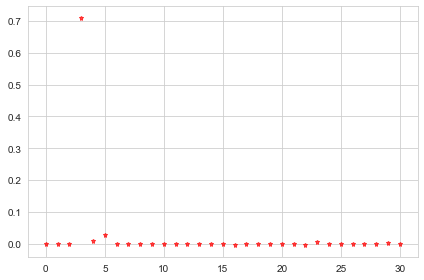

In [181]:
plt.plot(ridge_regression.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# L1

In [182]:
# Lasso
# lasso = Lasso(alpha=0.4, normalize=True)
lasso = Lasso(alpha=0.01)
lasso.fit(X_Train, Y_Train)

train_score=lasso.score(X_Train, Y_Train)
test_score=lasso.score(X_Valid, Y_Valid)
coeff_used = np.sum(lasso.coef_!=0)
lassopredic = lasso.predict(X_Valid).astype(int)

# print ("training score:", train_score) 
# print ("valid score: ", test_score)
# print ("number of features used: ", coeff_used)

In [183]:
#### Model Evaluation
print("Train accuracy:",train_score)
print("Validation accuracy:",metrics.accuracy_score(Y_Valid, lassopredic))
print("Precision:",metrics.precision_score(Y_Valid, lassopredic))
print("Recall:",metrics.recall_score(Y_Valid, lassopredic))

Train accuracy: 0.13546560836894883
Validation accuracy: 0.8607
Precision: 0.42857142857142855
Recall: 0.0007180469123982767


In [184]:
# X_Train.columns

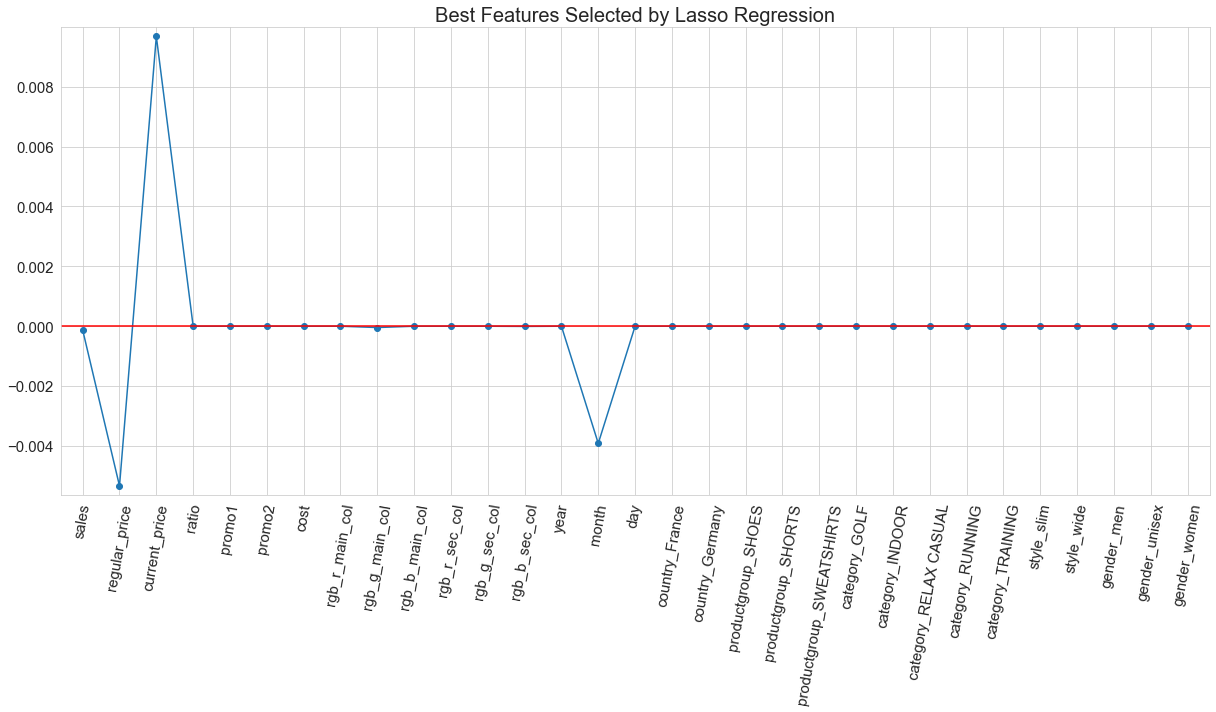

In [185]:
# Plot the best features, selected by the lasso regression
Features = X_Train.columns
Coef = lasso.coef_


plt.figure(figsize =(17, 10))
plt.title("Best Features Selected by Lasso Regression", fontsize=20)
plt.plot(range(len(Features)), Coef, marker='o')
plt.xticks(range(len(Features)), Features.values, rotation=80, fontsize =15)
plt.yticks(fontsize=15)
plt.axhline(y=0, color='r')
plt.margins(0.02)
plt.show()

# Compare models results

In [186]:
# Create a data frame
Models_Reesults = {'Model': ALL_Models, 'Train Accuracy': ALL_Train_Accuracy,
                   'Valid Accuracy': ALL_Valid_Accuracy, 'Precesion': ALL_Precesion,
                   'Recall': ALL_Recall}

Models_Reesults_df = pd.DataFrame(data = Models_Reesults, index=Models_Reesults['Model'])

In [193]:
# 
Models_Reesults_df.head()

,Model,Train Accuracy,Valid Accuracy,Precesion,Recall
KNN,KNN,0.86575714,0.79226667,0.31829441,0.43058880
SVC,SVC,0.85858571,0.85886667,0.46382429,0.08592628
Logistic,Logistic,0.79270000,0.78650000,0.35663705,0.66299665
Naive,Naive,0.76715714,0.76030000,0.33366457,0.72331259
Tree,Tree,0.99990000,0.80506667,0.31567329,0.34226903


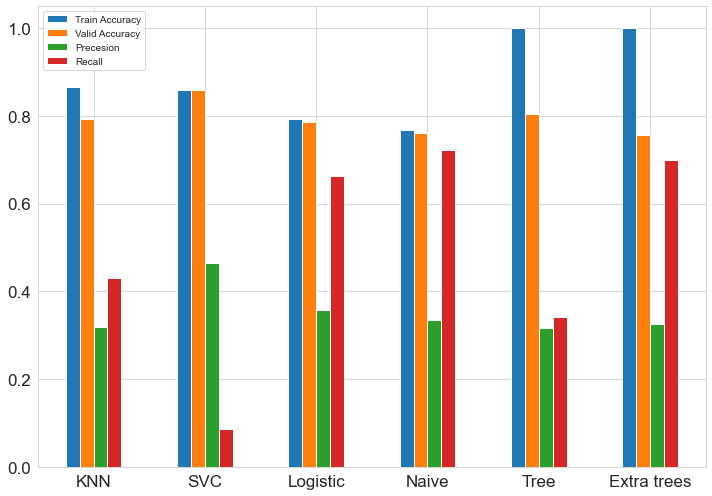

In [201]:
Models_Reesults_df.plot(kind='bar', figsize=(10,7), 
#                        stacked=True
                       )
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.legend(loc='best')
plt.show()